[[이유한님] 캐글 코리아 캐글 스터디 커널 커리큘럼](https://kaggle-kr.tistory.com/32)

[1st level. Costa Rican Household Poverty Level Prediction](https://www.kaggle.com/c/costa-rican-household-poverty-prediction)  
'#'은 wonder1ng 각주  
표기가 없거나 '##~'은 원본 각주(혹은 코드)

# [A Complete Introduction and Walkthrough](https://www.kaggle.com/code/willkoehrsen/a-complete-introduction-and-walkthrough/notebook)

## Costa Rican Household Poverty Level Prediction
Welcome to another Kaggle challenge! The objective of the Costa Rican Household Poverty Level Prediction contest is to develop a machine learning model that can predict the poverty level of households using both individual and household characteristics. This "data science for good" project offers the opportunity to put our skills towards a task more beneficial to society than getting people to click on ads!  
  
In this notebook, we will walk through a complete machine learning solution: first, get introduced to the problem, then perform a thorough Exploratory Data Analysis of the dataset, work on feature engineering, try out multiple machine learning models, select a model, work to optimize the model, and finally, inspect the outputs of the model and draw conclusions. __While this notebook may not get us to the top of the leaderboard, it is meant to be used as a teaching tool to give you a solid foundation to build on for future machine learning projects. Kaggle projects can teach us a lot about machine learning, but several of the strategies used to get to the very top of the leaderboard are not best practices, so here we'll stick to building a very good - although not quite first place - machine learning solution. While Kaggle projects are competitions, I think they are best described as "a machine learning education" disguised as a contest!"  
  
If you are looking to follow-up on this work, I have additional work including [a kernel on using Automated Feature Engineering](https://www.kaggle.com/code/willkoehrsen/featuretools-for-good/notebook) with [Featuretools](https://featuretools.alteryx.com/en/stable/#minute-quick-start) for this problem (with slightly higher leaderboard score). (If you enjoy my writing style and explanations, I write for [Towards Data Science](https://williamkoehrsen.medium.com/))  
  
### Problem and Data Explanation
The data for this competition is provided in two files: train.csv and test.csv. The training set has 9557 rows and 143 columns while the testing set has 23856 rows and 142 columns. Each row represents __one individual__ and each column is a __feature, either unique to the individual, or for the household of the individual.__ The training set has one additional column, Target, which represents the poverty level on a 1-4 scale and is the label for the competition. A value of 1 is the most extreme poverty.  
  
This is a __supervised multi-class classification machine learning problem:__  
  
- __Supervised:__ provided with the labels for the training data  
- __Multi-class classification:__ Labels are discrete values with 4 classes  
  
### Objective
The objective is to predict poverty on a __household level__. We are given data on the individual level with each individual having unique features but also information about their household. In order to create a dataset for the task, we'll have to perform some aggregations of the individual data for each household. Moreover, we have to make a prediction for every individual in the test set, but "ONLY the heads of household are used in scoring" which means we want to predict poverty on a household basis.

__Important note: while all members of a household should have the same label in the training data, there are errors where individuals in the same household have different labels. In these cases, we are told to use the label for the head of each household, which can be identified by the rows where `parentesco1 == 1.0`.__ We will cover how to correct this in the notebook (for more info take a look at the [competition main discussion](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)).

The `Target` values represent poverty levels as follows:

`1 = extreme poverty`  
`2 = moderate poverty`  
`3 = vulnerable households`  
`4 = non vulnerable households`
  
The explanations for all 143 columns can be found in the [competition documentation](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data), but a few to note are below:

- __Id:__ a unique identifier for each individual, this should not be a feature that we use!
- __idhogar:__ a unique identifier for each household. This variable is not a feature, but will be used to group individuals by household as all individuals in a household will have the same identifier.
- __parentesco1:__ indicates if this person is the head of the household.
- __Target:__ the label, which should be equal for all members in a household
  
When we make a model, we'll train on a household basis with the label for each household the poverty level of the head of household. The raw data contains a mix of both household and individual characteristics and for the individual data, we will have to find a way to aggregate this for each household. Some of the individuals belong to a household with no head of household which means that unfortunately we can't use this data for training. These issues with the data are completely typical of __real-world__ data and hence this problem is great preparation for the datasets you'll encounter in a data science job!  
  
### Metric
Ultimately we want to build a machine learning model that can predict the integer poverty level of a household. Our predictions will be assessed by the __Macro F1 Score.__ You may be familiar with the standard F1 score for binary classification problems which is the harmonic mean of precision and recall:  
  
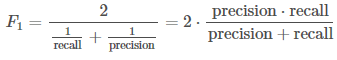
  
For mutli-class problems, we have to average the F1 scores for each class. The macro F1 score averages the F1 score for each class without taking into account label imbalances.  
  
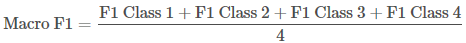
   
In other words, the number of occurrences of each label does not figure into the calculation when using macro (while it does when using the "weighted" score). (For more information on the differences, look at the [Scikit-Learn Documention for F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) or this [Stack Exchange question and answers](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin). If we want to assess our performance, we can use the code:  
`from sklearn.metrics import f1_score`
`f1_score(y_true, y_predicted, average = 'macro')`
  
For this problem, the labels are imbalanced, which makes it a little strange to use macro averaging for the evaluation metric, but that's a decision made by the organizers and not something we can change! In your own work, you want to be aware of label imbalances and choose a metric accordingly.
  
### Roadmap
The end objective is a machine learning model that can predict the poverty level of a household. However, before we get carried away with modeling, it's important to understand the problem and data. Also, we want to evaluate numerous models before choosing one as the "best" and after building a model, we want to investigate the predictions. Our roadmap is therefore as follows:  
  
1. Understand the problem (we're almost there already)
2. Exploratory Data Analysis
3. Feature engineering to create a dataset for machine learning
4. Compare several baseline machine learning models
5. Try more complex machine learning models
6. Optimize the selected model
7. Investigate model predictions in context of problem
8. Draw conclusions and lay out next steps
  
The steps laid out above are iterative meaning that while we will go through them one at a time, we might go back to an earlier step and revisit some of our decisions. In general, data science is a non-linear pracice where we are constantly evaluating our past decisions and making improvements. In particular, feature engineering, modeling, and optimization are steps that we often repeat because we never know if we got them right the first time!  
  
## DeepL 번역
또 다른 Kaggle 챌린지에 오신 것을 환영합니다! 코스타리카 가구 빈곤 수준 예측 콘테스트의 목표는 개인 및 가구 특성을 모두 사용하여 가구의 빈곤 수준을 예측할 수 있는 머신 러닝 모델을 개발하는 것입니다. 이 '선한 데이터 과학' 프로젝트는 사람들이 광고를 클릭하게 하는 것보다 사회에 더 유익한 일에 우리의 기술을 투입할 수 있는 기회를 제공합니다!  
  
이 노트북에서는 먼저 문제를 소개하고, 데이터 세트에 대한 철저한 탐색적 데이터 분석을 수행하고, 기능 엔지니어링 작업을 수행하고, 여러 머신러닝 모델을 시험해보고, 모델을 선택하고, 모델을 최적화하는 작업을 수행하고, 마지막으로 모델의 결과물을 검사하고 결론을 도출하는 등 완전한 머신러닝 솔루션의 과정을 안내합니다. 이 노트북으로 순위표의 정상에 오르지는 못하겠지만, 향후 머신 러닝 프로젝트를 위해 탄탄한 기초를 다질 수 있는 교육 도구로 사용할 수 있습니다. Kaggle 프로젝트를 통해 머신 러닝에 대해 많은 것을 배울 수 있지만, 리더보드의 최상위권에 오르는 데 사용된 몇 가지 전략은 모범 사례가 아니므로 여기서는 1등은 아니지만 매우 우수한 머신 러닝 솔루션을 구축하는 데 집중하겠습니다. Kaggle 프로젝트는 경연 대회이긴 하지만, 경연 대회로 위장한 '머신 러닝 교육'이라고 표현하는 것이 가장 적절하다고 생각합니다!"  
  
이 작업에 대한 후속 작업을 원하신다면, 이 문제에 대한 [자동화된 피처 엔지니어링 사용에 대한 커널](https://www.kaggle.com/code/willkoehrsen/featuretools-for-good/notebook)과 [Featuretools](https://featuretools.alteryx.com/en/stable/#minute-quick-start)를 포함한 추가 작업이 있습니다(리더보드 점수가 약간 더 높습니다). (제 글쓰기 스타일과 설명이 마음에 드신다면, [Towards Data Science](https://williamkoehrsen.medium.com/)에 글을 쓰기도 합니다).  
  
### 문제 및 데이터 설명
이 대회의 데이터는 train.csv와 test.csv의 두 가지 파일로 제공됩니다. 훈련 집합은 9557개의 행과 143개의 열로 구성되어 있고, 테스트 집합은 23856개의 행과 142개의 열로 구성되어 있습니다. 각 행은 __한 개인을__ 나타내고 각 열은 개인에게 고유하거나 개인의 가구에 대한 __특징을__ 나타냅니다. 훈련 집합에는 빈곤 수준을 1-4 척도로 나타내며 경쟁에 대한 레이블인 Target이라는 열이 하나 더 있습니다. 값이 1이면 가장 극심한 빈곤입니다.  
  
이것은 __다중 클래스 분류 머신 러닝 지도 학습 문제입니다:__  
  
- __지도 학습:__ 학습 데이터와 레이블이 함께 제공
- __다중 클래스 분류:__ 레이블은 4개의 클래스가 있는 불연속형 값입니다.
  
### 목표
목표는 __가구 수준에서__ 빈곤을 예측하는 것입니다. 각 개인의 고유한 특징과 가구에 대한 정보가 포함된 개인 수준의 데이터가 주어집니다. 이 작업을 위한 데이터 집합을 만들려면 각 가구에 대한 개별 데이터의 일부 집계를 수행해야 합니다. 또한 테스트 세트의 모든 개인에 대해 예측을 수행해야 하지만 "가구주만 채점에 사용"하므로 가구 단위로 빈곤을 예측하고자 합니다.

__중요 참고 사항: 한 가구의 모든 구성원이 훈련 데이터에서 동일한 레이블을 가져야 하지만, 같은 가구의 개인이 다른 레이블을 갖는 오류가 발생할 수 있습니다. 이러한 경우 각 가구의 가장에 대한 레이블을 사용하라는 메시지가 표시되며, 이는 `parentesco1 == 1.0`인 행으로 식별할 수 있습니다.__ 노트북에서 이 문제를 해결하는 방법을 다룰 것입니다(자세한 내용은 [대회 메인 토론](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)을 참조하세요).

`목표` 값은 다음과 같이 빈곤 수준을 나타냅니다:

`1 = 극심한 빈곤`  
`2 = 중간 정도의 빈곤`  
`3 = 취약한 가구`  
`4 = 비취약 가구`  
  
143개의 모든 열에 대한 설명은 [대회 문서](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data)에서 확인할 수 있지만, 몇 가지 주의해야 할 사항은 다음과 같습니다:  
  
- __Id:__ 각 개인에 대한 고유 식별자, 우리가 사용하는 기능이 아니어야 합니다!
- __idhogar:__ 각 가구의 고유 식별자. 이 변수는 기능은 아니지만 한 가구의 모든 개인이 동일한 식별자를 갖게 되므로 가구별로 개인을 그룹화하는 데 사용됩니다.
- __parentesco1:__ 세대주인지 여부를 나타냅니다.
- __Target:__ 가구의 모든 구성원에게 동일한 레이블입니다.
  
모델을 만들 때 각 가구에 가구주의 빈곤 수준을 레이블로 지정하여 가구 단위로 훈련합니다. 원시 데이터에는 가구 및 개인 특성이 혼합되어 있으므로 개인 데이터의 경우 각 가구에 대해 이를 집계하는 방법을 찾아야 합니다. 일부 개인은 세대주가 없는 가구에 속해 있기 때문에 안타깝게도 이 데이터를 훈련에 사용할 수 없습니다. 이러한 데이터 문제는 __실세계__ 데이터에서 흔히 볼 수 있는 문제이므로 데이터 과학 업무에서 마주하게 될 데이터 집합에 대한 훌륭한 준비 과정입니다!  
  
### Metric
궁극적으로 우리는 한 가구의 정수형 빈곤 수준을 예측할 수 있는 머신 러닝 모델을 구축하고자 합니다. __매크로 F1 점수로__ 예측을 평가할 것입니다. 이진 분류 문제에 대한 표준 F1 점수는 정확도와 재현율의 조화 평균으로, 익히 알고 계실 것입니다:  
  
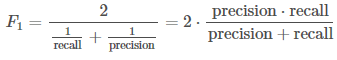
  
다중 클래스 문제의 경우 각 클래스의 F1 점수의 평균을 구해야 합니다. 매크로 F1 점수는 라벨 불균형을 고려하지 않고 각 클래스의 F1 점수의 평균을 구합니다.  
  
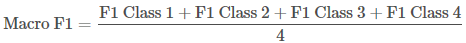
  
즉, 매크로를 사용할 때는 각 레이블의 발생 횟수가 계산에 포함되지 않습니다(반면 "가중치" 점수를 사용할 때는 포함됨). (차이점에 대한 자세한 내용은 [F1 점수에 대한 Scikit-Learn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) 또는 이 [스택 교환 질문과 답변](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)을 참조하세요. 성능을 평가하고 싶다면 코드를 사용할 수 있습니다:  
`from sklearn.metrics import f1_score`
`f1_score(y_true, y_predicted, average = 'macro')`
  
이 문제의 경우 레이블이 불균형하기 때문에 평가 지표에 매크로 평균을 사용하는 것이 조금 이상하지만, 이는 주최 측에서 결정한 사항이며 저희가 변경할 수 있는 사항이 아닙니다! 자신의 작업에서 라벨 불균형을 인식하고 그에 따라 지표를 선택하는 것이 좋습니다.
  
### Roadmap
최종 목표는 가구의 빈곤 수준을 예측할 수 있는 머신러닝 모델을 만드는 것입니다. 하지만 모델링에 몰두하기 전에 문제와 데이터를 이해하는 것이 중요합니다. 또한 수많은 모델을 평가한 후 '가장 좋은' 모델을 선택하고, 모델을 구축한 후에는 예측 결과를 조사하고자 합니다. 따라서 우리의 로드맵은 다음과 같습니다:  
  
1. 문제를 이해합니다(이미 거의 다 이해했습니다).
2. 탐색적 데이터 분석
3. 머신 러닝을 위한 데이터 세트 생성을 위한 기능 엔지니어링
4. 여러 기준 머신 러닝 모델 비교
5. 더 복잡한 머신러닝 모델 시도하기
6. 선택한 모델 최적화하기
7. 문제의 맥락에서 모델 예측 조사하기
8. 결론 도출 및 다음 단계 계획
  
위에 설명한 단계는 반복적이기 때문에 한 번에 하나씩 진행하지만, 이전 단계로 돌아가서 일부 결정을 다시 검토할 수도 있습니다. 일반적으로 데이터 과학은 과거의 의사 결정을 지속적으로 평가하고 개선하는 비선형적인 프로세스입니다. 특히 기능 엔지니어링, 모델링 및 최적화는 처음에 제대로 했는지 알 수 없기 때문에 자주 반복하는 단계입니다!  

## Getting Started
We have a pretty good grasp of the problem, so we'll move into the Exploratory Data Analysis (EDA) and feature engineering. For the EDA we'll examine any interesting anomalies, trends, correlations, or patterns that can be used for feature engineering and for modeling. We'll make sure to investigate our data both quantitatively (with statistics) and visually (with figures).  
  
Once we have a good grasp of the data and any potentially useful relationships, we can do some feature engineering (the most important part of the machine learning pipeline) and establish a baseline model. This won't get us to the top of the leaderboard, but it will provide a strong foundation to build on!  
  
With all that info in mind (don't worry if you haven't got all the details), let's get started!  
  
## DeepL 번역
문제를 꽤 잘 파악했으므로 이제 탐색적 데이터 분석(EDA)과 피처 엔지니어링으로 넘어가겠습니다. EDA에서는 피처 엔지니어링과 모델링에 사용할 수 있는 흥미로운 이상 징후, 추세, 상관관계 또는 패턴을 조사할 것입니다. 데이터를 정량적(통계)으로, 그리고 시각적(그림)으로 조사할 것입니다.  
  
데이터와 잠재적으로 유용한 관계를 잘 파악하고 나면 머신 러닝 파이프라인에서 가장 중요한 부분인 피처 엔지니어링을 수행하고 기준 모델을 설정할 수 있습니다. 이렇게 한다고 해서 순위표의 정상에 오를 수는 없지만, 그 위에 구축할 수 있는 강력한 토대를 제공할 수 있습니다!  
  
이 모든 정보를 염두에 두고(모든 세부 사항을 파악하지 못했더라도 걱정하지 마세요) 시작해 봅시다!

### Imports
We'll use a familiar stack of data science libraries: Pandas, numpy, matplotlib, seaborn, and eventually sklearn for modeling.

In [1]:
## Data manipulation
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Set a few plotting defaults
%matplotlib inline
# plt.style.use('fivethirtyeight')
# plt.rcParams['font.size'] = 18
# plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
### Read in Data and Look at Summary information

# pd.options.display.max_columns = 150

## Read in data
train = pd.read_csv('./input/004_costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('./input/004_costa-rican-household-poverty-prediction/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### Integer Columns
Let's look at the distribution of unique values in the integer columns. For each column, we'll count the number of unique values and show the result in a bar plot.

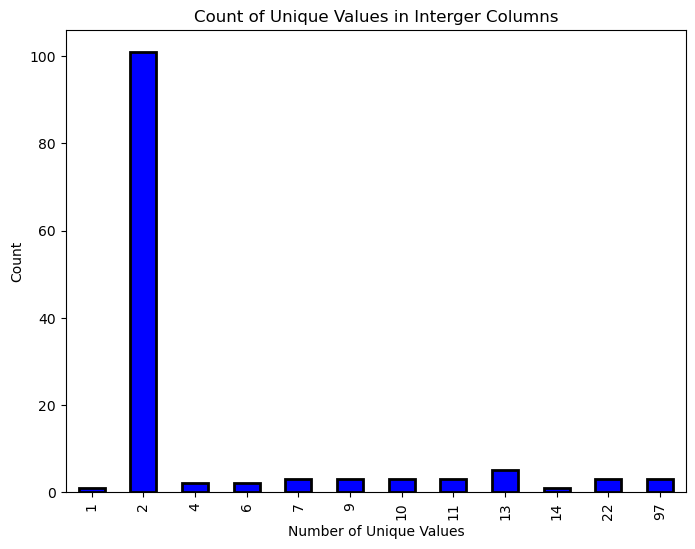

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue', figsize=(8,6), edgecolor='k', linewidth=2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Interger Columns');

The columns with only 2 unique values represent Booleans (0 or 1). In a lot of cases, this boolean information is already on a household level. For example, the refrig column says whether or not the household has a refrigerator. When it comes time to make features from the Boolean columns that are on the household level, we will not need to aggregate these. However, the Boolean columns that are on the individual level will need to be aggregated.  
  
### Float Columns
Another column type is floats which represent continuous variables. We can make a quick distribution plot to show the distribution of all float columns. We'll use an OrderedDict to map the poverty levels to colors because this keeps the keys and values in the same order as we specify (unlike a regular Python dictionary).  
  
The following graphs shows the distributions of the float columns colored by the value of the Target. With these plots, we can see if there is a significant difference in the variable distribution depending on the household poverty level.  
  
### DeepL 번역
고유 값이 2개만 있는 열은 부울(0 또는 1)을 나타냅니다. 대부분의 경우 이 부울 정보는 이미 가구 수준에 있습니다. 예를 들어, 냉장고 열은 가구에 냉장고가 있는지 여부를 나타냅니다. 가구 수준에 있는 부울 열에서 기능을 만들 때는 이러한 정보를 집계할 필요가 없습니다. 그러나 개인 수준의 부울 열은 집계해야 합니다.  
  
### Float Columns
또 다른 열 유형은 연속형 변수를 나타내는 실수 열입니다. 모든 부동형 열의 분포를 보여주기 위해 빠른 분포도를 만들 수 있습니다. 일반 파이썬 딕셔너리와 달리 키와 값이 지정한 순서대로 유지되므로 빈곤 수준을 색상에 매핑하기 위해 OrderedDict를 사용하겠습니다.  
  
다음 그래프는 Target 값에 따라 색상이 지정된 실수 열의 분포를 보여줍니다. 이 그래프를 통해 가구 빈곤 수준에 따라 변수 분포에 유의미한 차이가 있는지 확인할 수 있습니다.

c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

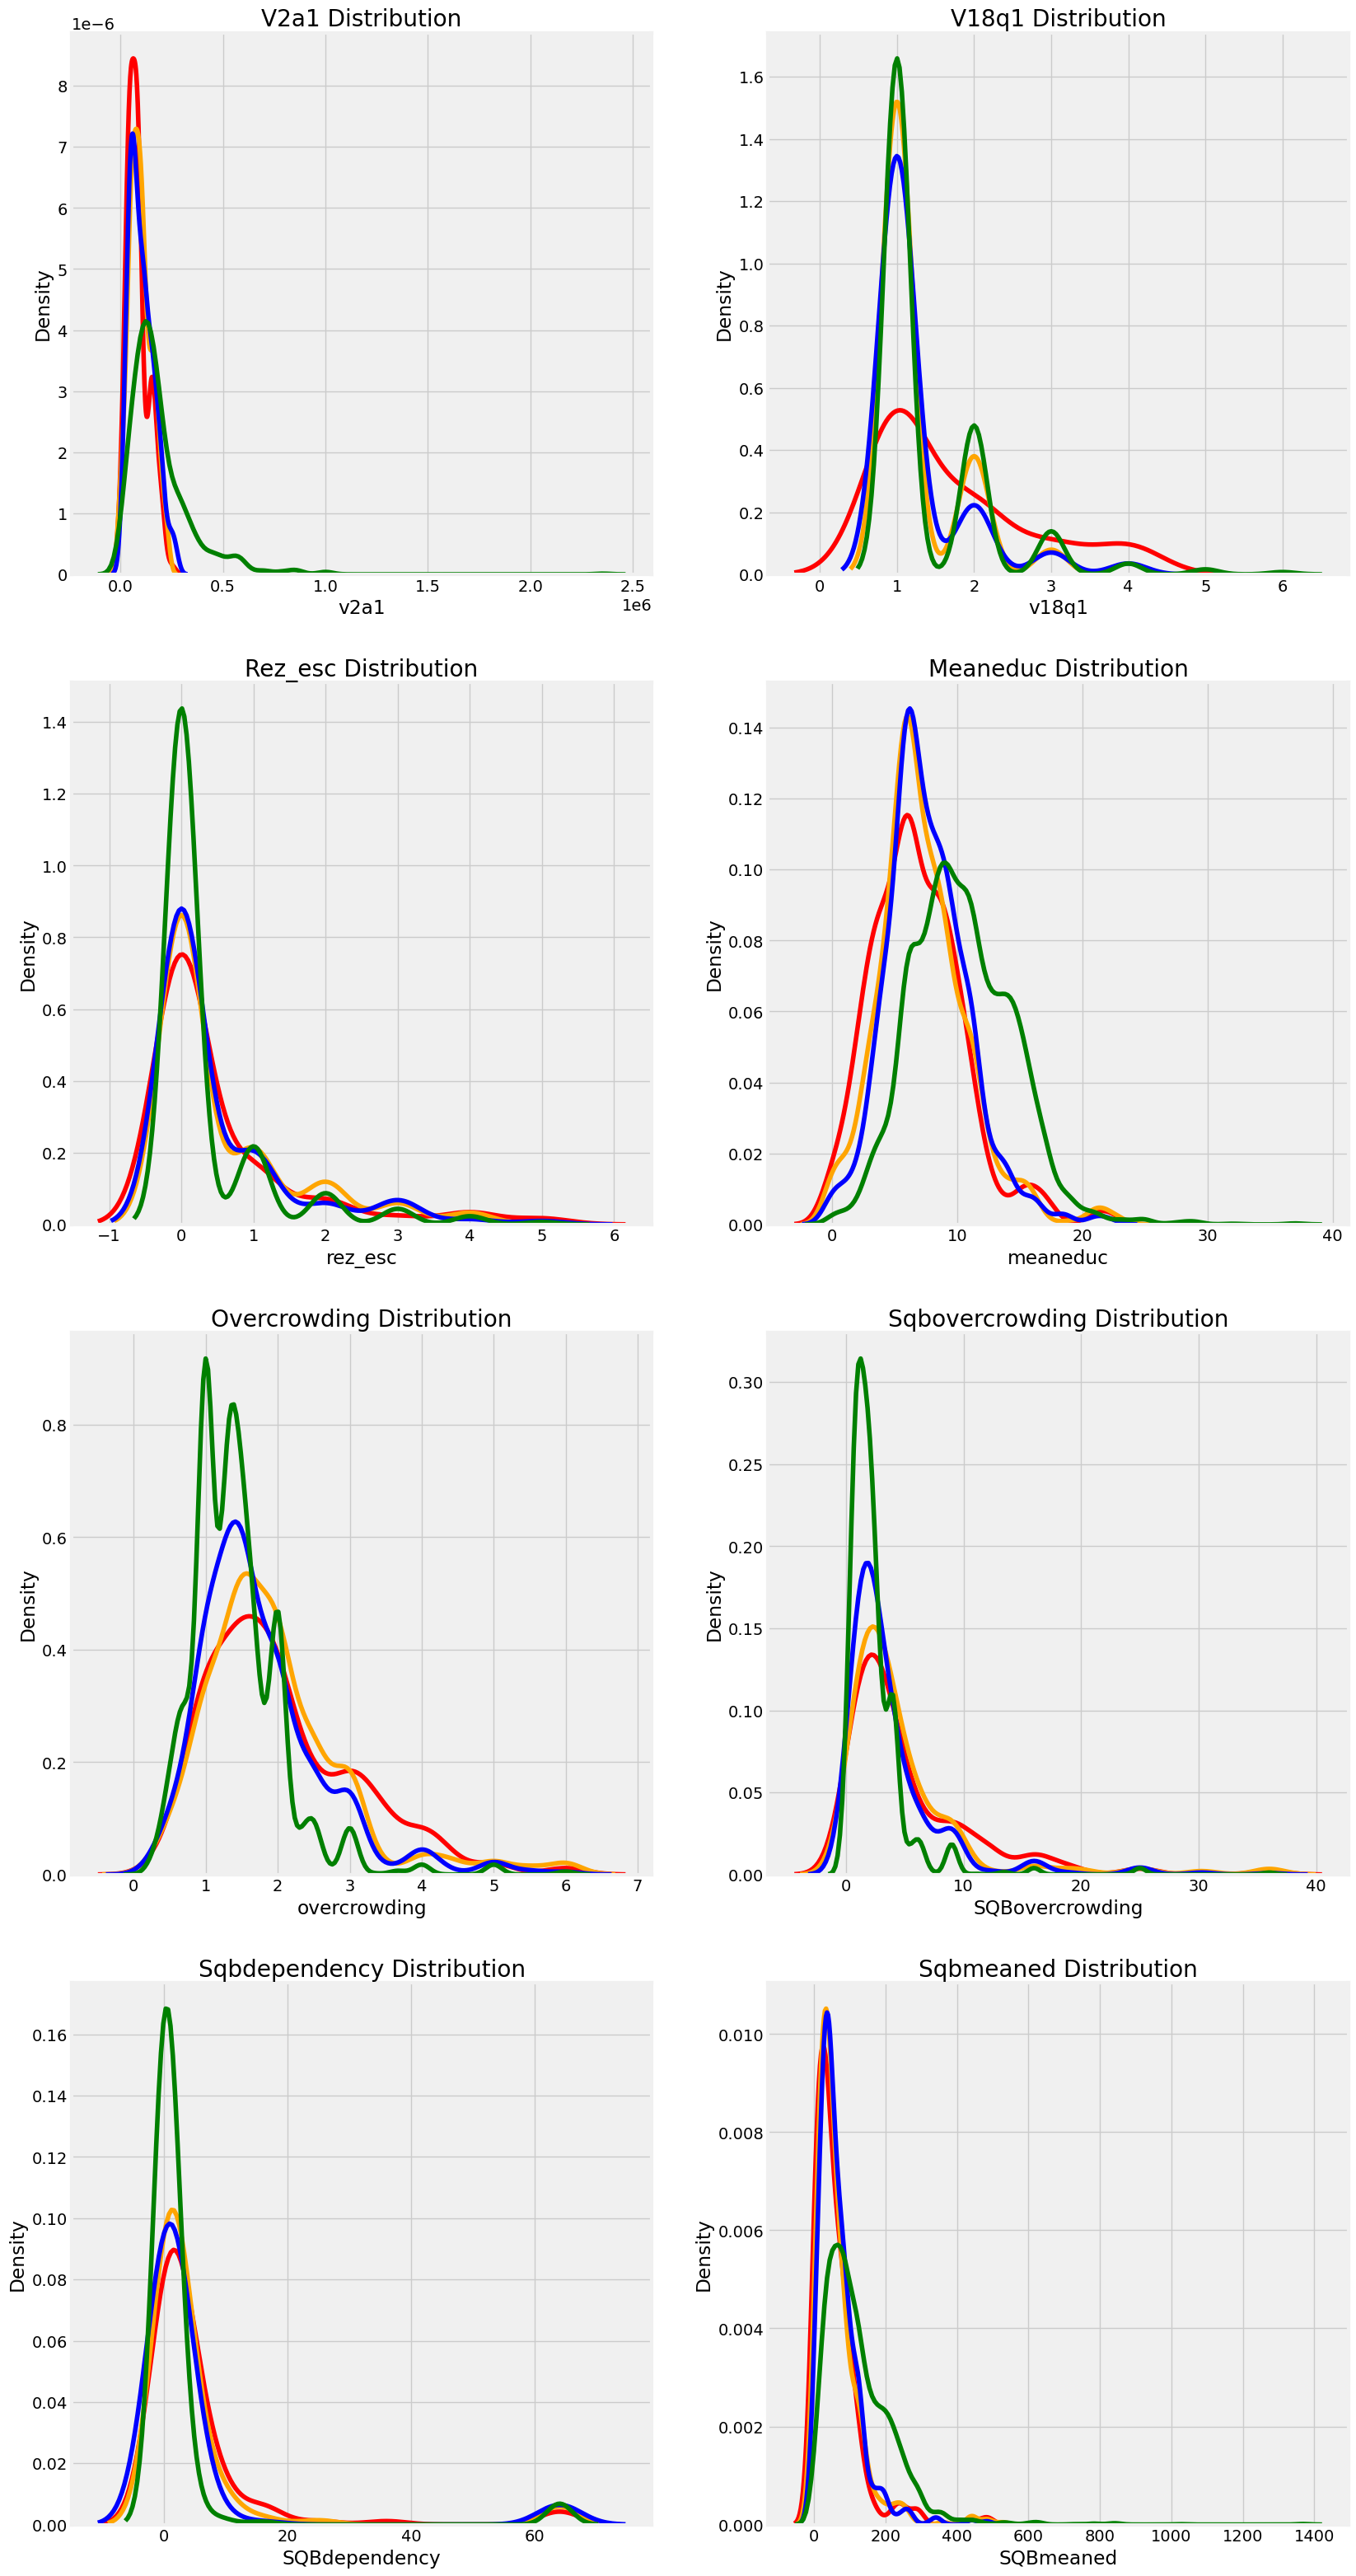

In [6]:
from collections import OrderedDict
# 파이썬 3.6이하에서는 dictionary의 순서가 보장되지 않아 OrderedDict 사용.
# 3.7이상에서도 OrderedDict을 사용함으로써 하위 버전에서 순서를 보장.
# 또한 3.7이상에서도 딕셔너리 간의 동등성 비교할 경우 OrderedDict은 순서 동일까지 검증.

plt.figure(figsize=(20,16))
plt.style.use('fivethirtyeight')

## Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

## Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    ## Iterate through the poverty levels
    for poverty_level, color in colors. items():
        ## Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution')   # str.capitalize(): 어절의 첫글자는 대문자, 외는 소문자 변환.
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.legend;

plt.subplots_adjust(top=2);

In [7]:
# from collections import OrderedDict

# plt.figure(figsize = (20, 16))
# plt.style.use('fivethirtyeight')

# # Color mapping
# colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
# poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# # Iterate through the float columns
# for i, col in enumerate(train.select_dtypes('float')):
#     ax = plt.subplot(4, 2, i + 1)
#     # Iterate through the poverty levels
#     for poverty_level, color in colors.items():
#         # Plot each poverty level as a separate line
#         sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
#                     ax = ax, color = color, label = poverty_mapping[poverty_level])
        
#     plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
#     plt.legend()

# plt.subplots_adjust(top = 2)

Later on we'll calculate correlations between the variables and the Target to gauge the relationships between the features, but these plots can already give us a sense of which variables may be most "relevant" to a model. For example, the meaneduc, representing the average education of the adults in the household appears to be related to the poverty level: __a higher average adult education leads to higher values of the target which are less severe levels of poverty.__ The theme of the importance of education is one we will come back to again and again in this notebook!  
  
__DeepL 번역__  
나중에 변수와 대상 간의 상관 관계를 계산하여 기능 간의 관계를 측정할 것이지만, 이 플롯을 통해 어떤 변수가 모델과 가장 '관련성'이 높은지 이미 파악할 수 있습니다. 예를 들어, 가구 내 성인의 평균 학력을 나타내는 평균 학력은 빈곤 수준과 관련이 있는 것으로 보입니다: __성인 평균 교육 수준이 높을수록 빈곤 수준이 덜 심각한 대상의 값이 높아집니다.__ 교육의 중요성에 대한 주제는 이 노트북에서 계속해서 다시 다룰 주제입니다!

In [8]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


The Id and idhogar object types make sense because these are identifying variables. However, the other columns seem to be a mix of strings and numbers which we'll need to address before doing any machine learning. According to the documentation for these columns:  
  
- dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
  
These explanations clear up the issue. For these three variables, __"yes" = 1__ and __"no" = 0__. We can correct the variables using a mapping and convert to floats.  
  
__DeepL 번역__
Id 및 idhogar 객체 유형은 식별 변수이므로 의미가 있습니다. 그러나 다른 열은 문자열과 숫자가 혼합되어 있어 머신 러닝을 수행하기 전에 처리해야 할 것 같습니다. 이러한 열에 대한 설명서에 따르면:  
  
- dependency: 부양 비율, 계산 = (19세 미만 또는 64세 이상 가구원 수)/(19세 이상 64세 미만 가구원 수)
- edjefe: 남성 세대주의 교육 연한, 에스콜라리(교육 연한), 세대주 및 성별의 상호작용에 기반, 예=1, 아니오=0
- edjefa: 에스꼴라리(교육 년수), 세대주 및 성별의 상호작용을 기준으로 한 여성 세대주의 교육 년수, 예=1, 아니오=0
  
이러한 설명을 통해 문제가 명확해집니다. 이 세 가지 변수의 경우 __"yes" = 1__, __"no" = 0__ 입니다. 매핑을 사용하여 변수를 수정하고 부동 소수점으로 변환할 수 있습니다.

In [9]:
mapping = {'yes': 1, 'no': 0}

## Apply same operation to both train and test
for df in [train, test]:
    ## Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()


,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


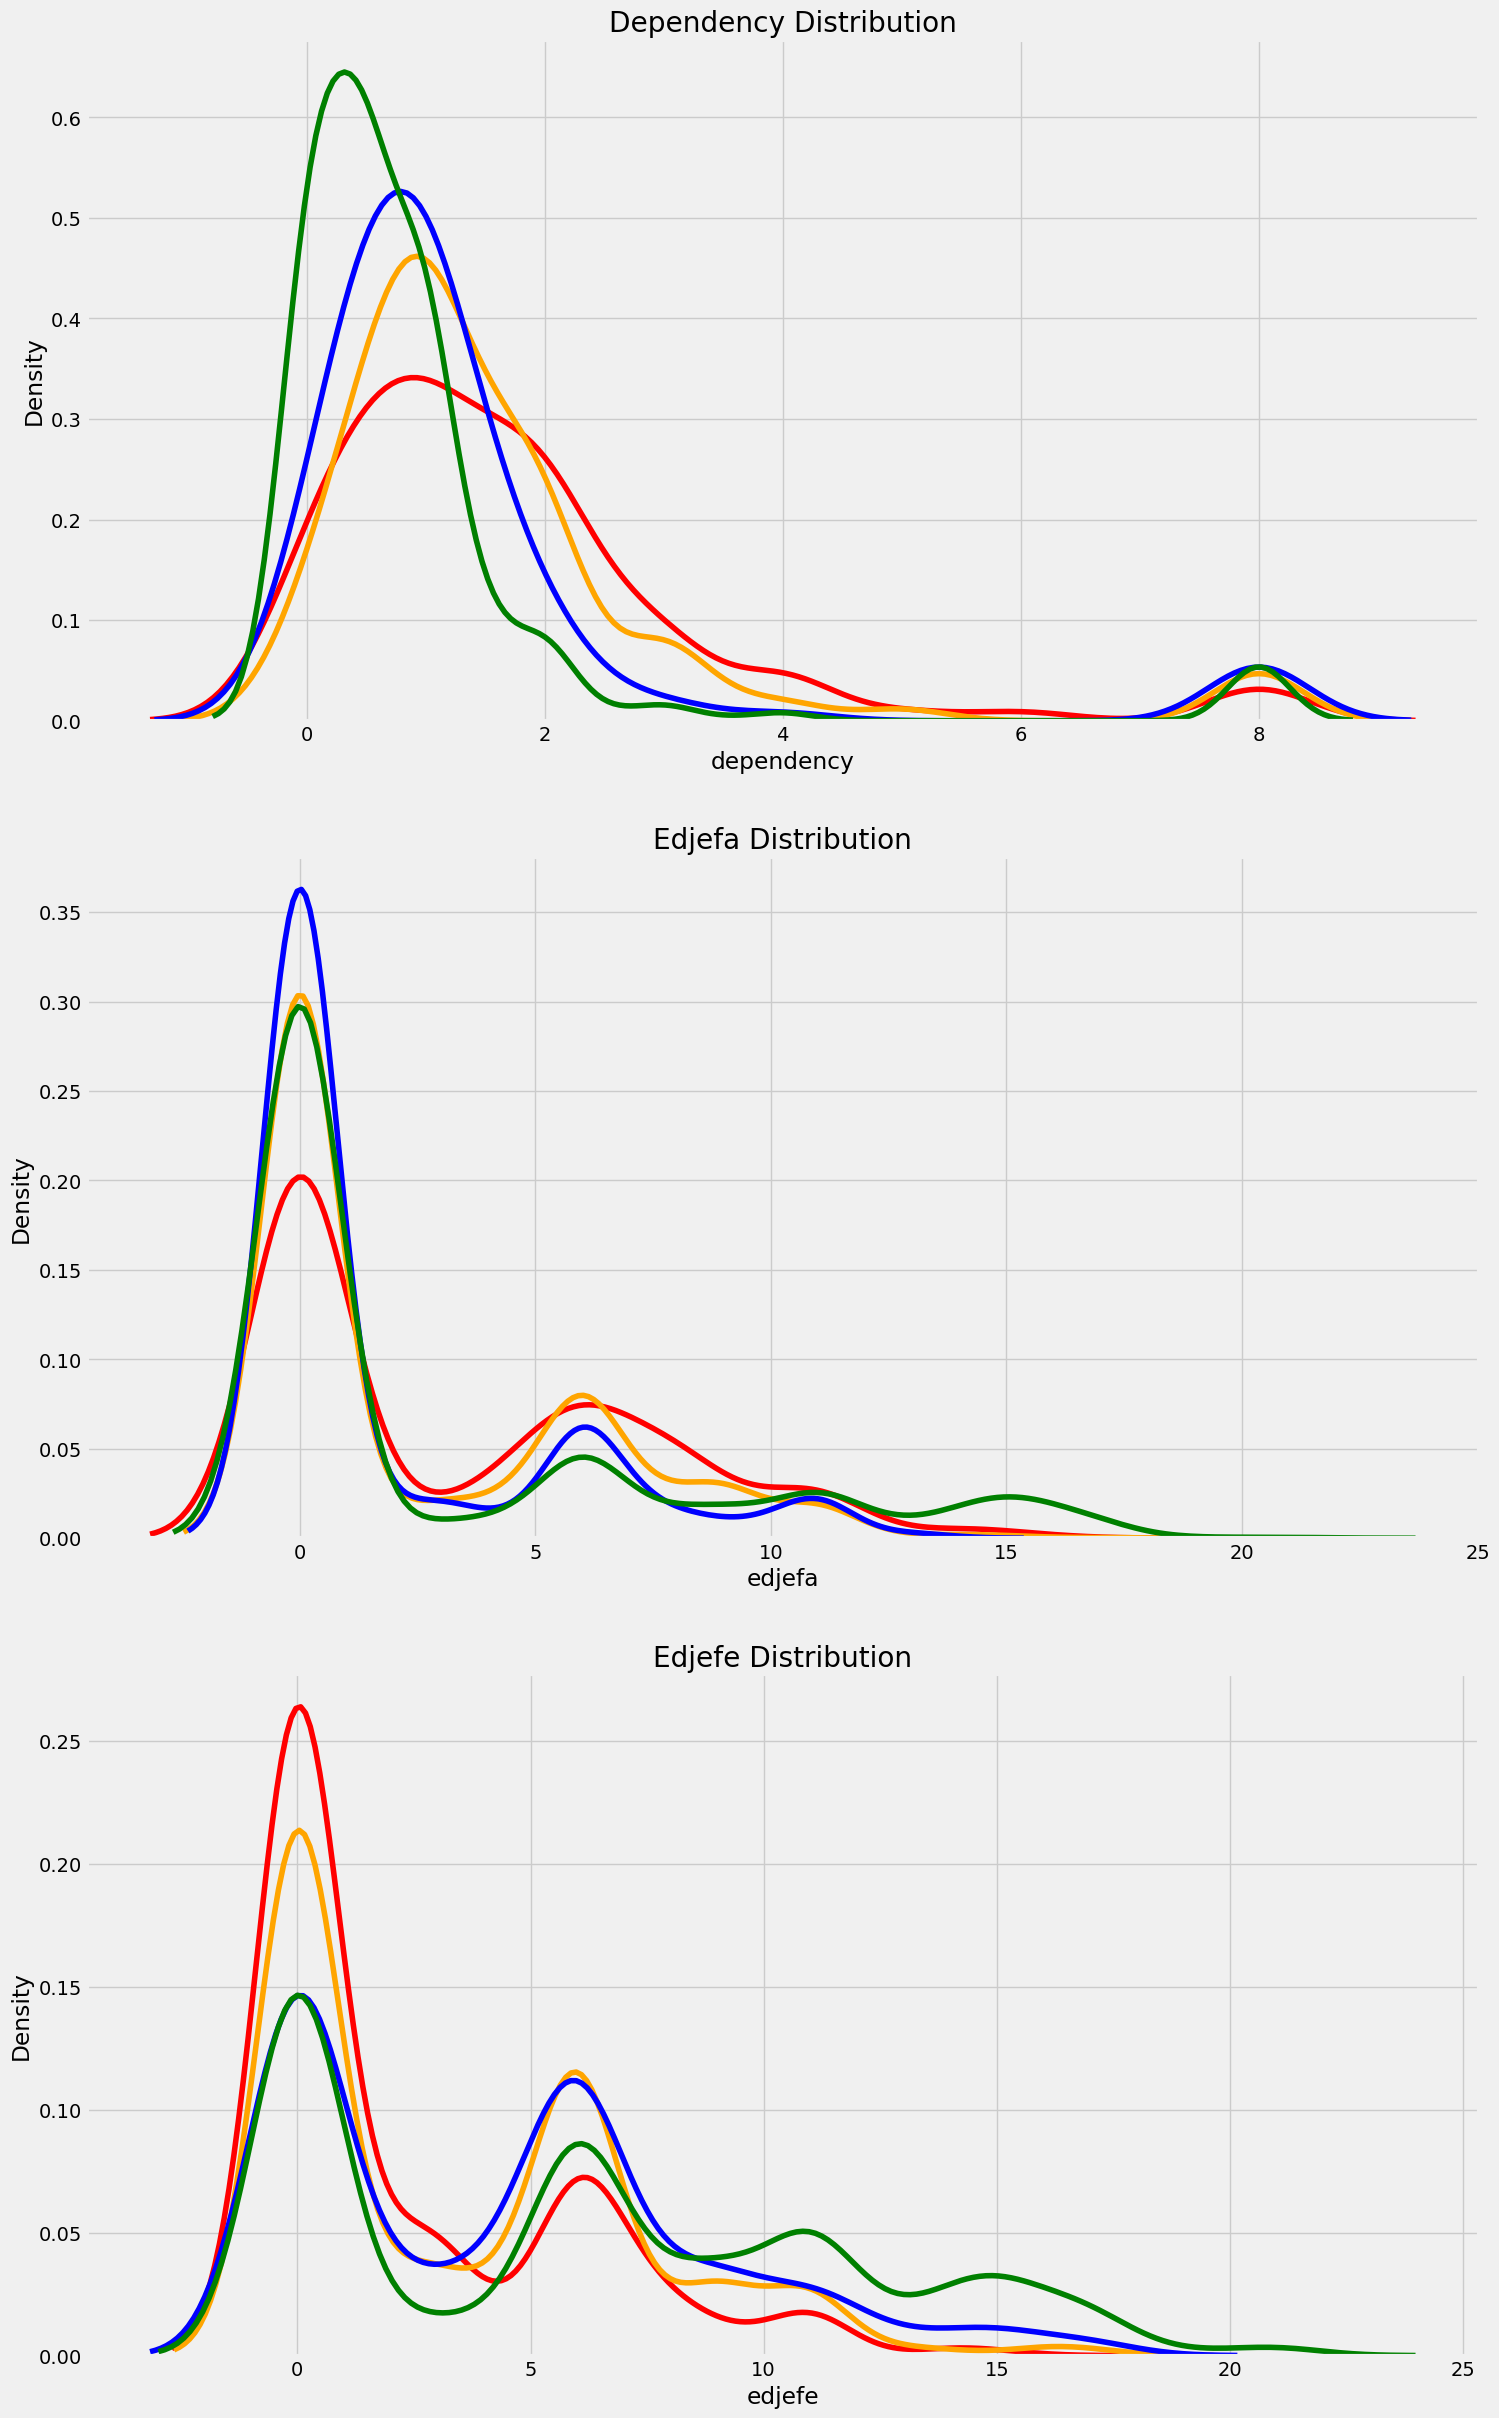

In [10]:
plt.figure(figsize=(16,12))

## Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    ## Iterate through the poverty levels
    for poverty_level, color in colors.items():
        ## Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])
    
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')

plt.subplots_adjust(top=2)

These variables are now correctly represented as numbers and can be fed into a machine learning model.  
  
To make operations like that above a little easier, we'll join together the training and testing dataframes. This is important once we start feature engineering because we want to apply the same operations to both dataframes so we end up with the same features. Later we can separate out the sets based on the `Target`.  
  
__DeepL 번역__  
이제 이러한 변수가 숫자로 올바르게 표현되어 머신 러닝 모델에 입력할 수 있습니다.  
  
위와 같은 작업을 좀 더 쉽게 하기 위해 학습 및 테스트 데이터 프레임을 함께 결합하겠습니다. 이는 피쳐 엔지니어링을 시작할 때 중요한데, 두 데이터 프레임에 동일한 연산을 적용하여 동일한 기능으로 끝내야 하기 때문입니다. 나중에 `Target`을 기준으로 세트를 분리할 수 있습니다.

In [11]:
## Add null Target column to test
test['Target'] = np.nan
# data = train.append(test, ignore_index=True)
data = pd.concat([train, test], ignore_index=True)

### Exploring Label Distribution
Next, we can get an idea of how imbalanced the problem is by looking at the distribution of labels. There are four possible integer levels, indicating four different levels of poverty. To look at the correct labels, we'll subset only to the columns where `parentesco1 == 1` because this is the head of household, the correct label for each household.  
  
The bar plot below shows the distribution of training labels (since there are no testing labels).  
  
### DeepL 번역
다음으로, 라벨의 분포를 살펴보면 문제의 불균형이 어느 정도인지 파악할 수 있습니다. 네 가지 가능한 정수 레벨이 있으며, 이는 네 가지 다른 빈곤 수준을 나타냅니다. 올바른 레이블을 살펴보기 위해, 각 가구의 올바른 레이블인 세대주이므로 `parentesco1 == 1`인 열로만 하위 집합을 만들겠습니다.  
  
아래 막대 그래프는 훈련 레이블의 분포를 보여줍니다(테스트 레이블이 없으므로).

Target
1.0     222
2.0     442
3.0     355
4.0    1954
Name: count, dtype: int64

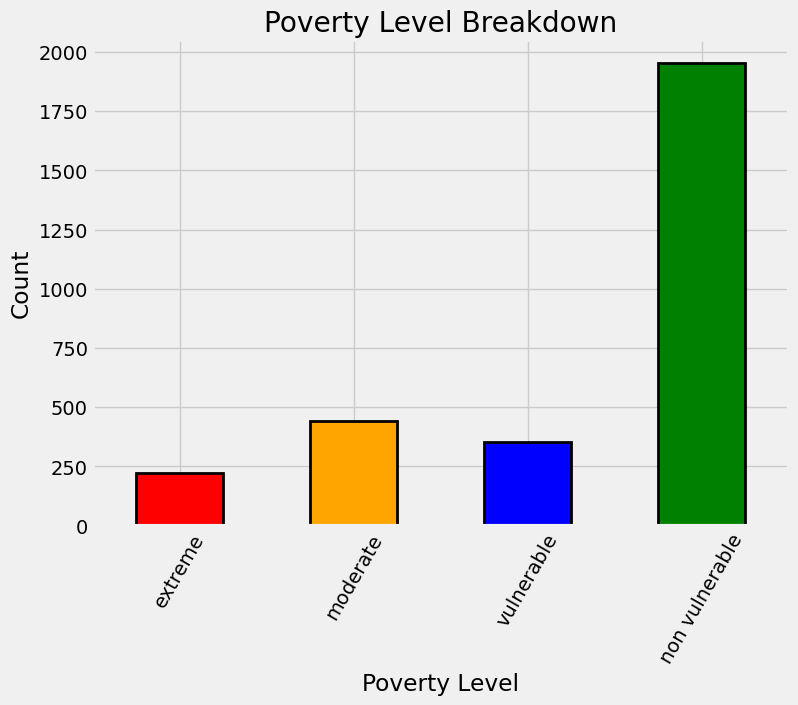

In [12]:
## Head of household
heads = data.loc[data['parentesco1']==1].copy()

## Labels for training
train_labels = data.loc[(data['Target'].notnull())&(data['parentesco1']==1), ['Target', 'idhogar']]

## Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

## Bar plot of occurrences of each label
label_counts.plot.bar(figsize=(8,6),
                      color=colors.values(),
                      edgecolor='k', linewidth=2)

## Formatting
plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x-1 for x in poverty_mapping.keys()],
           list(poverty_mapping.values()), rotation=60)
plt.title('Poverty Level Breakdown')

label_counts

We are dealing with an imbalanced class problem (which makes it intriguing why the contest organizers choose the macro F1 score as the metric instead of weighted F1!). There are many more households that classify as non vulnerable than in any other category. The extreme poverty class is the smallest (I guess this should make us optimistic!).  
  
One problem with imbalanced classification problems is that the machine learning model can have a difficult time predicting the minority classes because it sees far less examples. Think about this in human terms: if we are classifiying poverty and we see far more cases of no poverty than extreme poverty, it will make it more difficult for us to identify the high poverty households because of less exposure. One potential method to address class imbalanceds is through oversampling (which is covered in more advanced notebooks).  

### Addressing Wrong Labels
As with any realistic dataset, the Costa Rican Poverty data has some issues. Typically, 80% of a data science project will be spent cleaning data and fixing anomalies/errors. These can be either human entry errors, measurement errors, or sometimes just extreme values that are correct but stand out. For this problem, some of the labels are not correct because individuals in the same household have a different poverty level. We're not told why this may be the case, but we are told to use the head of household as the true label.  
  
That information makes our job much easier, but in a real-world problem, we would have to figure out the reason Why the labels are wrong and how to address the issue on our own. This section fixes the issue with the labels although it is not strictly necessary: I kept it in the notebook just to show how we may deal with this issue.   

__Identify Errors__  
First we need to find the errors before we can correct them. To find the households with different labels for family members, we can group the data by the household and then check if there is only one unique value of the Target. 
    
__DeepL 번역__  
우리는 불균형한 계층 문제를 다루고 있습니다(대회 주최 측이 왜 가중치 F1 대신 macro F1 점수를 지표로 선택했는지 흥미롭습니다!). 비취약계층으로 분류되는 가구가 다른 어떤 범주보다 훨씬 더 많습니다. 극빈층이 가장 적습니다(이 정도면 낙관적이어야 할 것 같습니다!).

불균형한 분류 문제의 한 가지 문제점은 머신러닝 모델이 훨씬 적은 사례를 보기 때문에 소수 계층을 예측하는 데 어려움을 겪을 수 있다는 것입니다. 빈곤을 분류할 때 극빈층보다 빈곤하지 않은 사례가 훨씬 더 많다면, 노출되는 사례가 적기 때문에 빈곤층을 식별하기가 더 어려워질 수 있다는 것을 인간의 관점에서 생각해 보세요. 계층 불균형을 해결하기 위한 한 가지 잠재적인 방법은 오버샘플링(고급 노트북에서 다루고 있는 방법)을 사용하는 것입니다.  

### 잘못된 레이블 해결  
다른 현실적인 데이터 집합과 마찬가지로 코스타리카 빈곤 데이터에도 몇 가지 문제가 있습니다. 일반적으로 데이터 과학 프로젝트의 80%는 데이터를 정리하고 이상 징후나 오류를 수정하는 데 소요됩니다. 이러한 오류는 사람의 입력 오류, 측정 오류 또는 때로는 정확하지만 눈에 띄는 극단적인 값일 수 있습니다. 이 문제의 경우, 같은 가구 내 개인이 다른 빈곤 수준을 가지고 있기 때문에 일부 라벨이 정확하지 않습니다. 이 경우 그 이유는 알려주지 않지만, 세대주를 실제 라벨로 사용하라는 지시를 받습니다.  
  
이러한 정보는 우리의 업무를 훨씬 쉽게 만들어 주지만, 실제 문제 발생 시에는 라벨이 잘못된 이유와 문제를 해결하는 방법을 스스로 알아내야 합니다. 이 섹션에서는 꼭 필요한 것은 아니지만 라벨 문제를 해결합니다: 이 문제를 어떻게 해결할 수 있는지 보여드리기 위해 노트북에 보관해 두었습니다.  
  
__오류 식벌__  

오류를 수정하기 전에 먼저 오류를 찾아야 합니다. 가족 구성원의 레이블이 다른 가구를 찾으려면 데이터를 가구별로 그룹화한 다음 대상의 고유 값이 하나만 있는지 확인하면 됩니다.

In [13]:
## Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)

## Households where targets are not all equal
not_equal = all_equal[all_equal!=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal              )))

There are 85 households where the family members do not all have the same target.


In [14]:
train[train['idhogar']==not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


The organizers tell us that the correct label is that for the head of household, where `parentesco1 == 1`. For this household, the correct label is __3__ for all members. We can correct this (as shown later) by reassigning all the individuals in this household the correct poverty level. In the real-world, you might have to make the tough decision of how to address the problem by yourself (or with the help of your team).  
  
### Families without Heads of Household
We can correct all the label discrepancies by assigning the individuals in the same household the label of the head of household. But wait, you may ask: "What if there are households without a head of household? And what if the members of those households have differing values of the label?"  
  
Well, since you asked, let's investigate exactly that question!  

__DeepL 번역__  

주최 측에 따르면 올바른 레이블은 세대주의 경우 `parentesco1 == 1`입니다. 이 가구의 경우 모든 구성원에 대한 올바른 레이블은 __3__ 입니다. 이 가구의 모든 개인에게 올바른 빈곤 수준을 다시 할당하여 (나중에 표시된 것처럼) 이를 수정할 수 있습니다. 현실에서는 혼자서(또는 팀의 도움을 받아) 문제를 해결하는 방법에 대한 어려운 결정을 내려야 할 수도 있습니다.  
  
### Families without Heads of Household
같은 가구에 속한 개인에게 세대주 라벨을 지정하여 라벨 불일치를 모두 수정할 수 있습니다. 하지만 잠깐만요, 세대주가 없는 가구가 있다면 어떻게 해야 하나요? 그리고 그 가구의 구성원들이 라벨의 값이 서로 다르면 어떻게 하나요?"라고 질문할 수 있습니다.  
  
질문이 있으셨으니 그 질문에 대해 정확히 조사해 보겠습니다!

In [15]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

## Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader==0]).index, :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))
# 노트북의 결과는 15인데 왜 2988이 나오는지 모르겠음.
# 이전 그래프들도 형태가 달라도 무시했었는데 계속 산출이 다름.

There are 2988 households without a head.


In [16]:
## Find house holds without a head and where label are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)
print('{} Households with no head have different labels'.format(sum(households_no_head_equal==False)))

# 노트북의 결과는 0

85 Households with no head have different labels


Well that's a relief! This means that we don't have to worry about a household both where there is no head __AND__ the members have different values of the label! For this problem, according to the organizers, __if a household does not have a head, then there is no true label. Therefore, we actually won't use any of the households without a head for training__ Nonetheless, it's still a good exercise to go through this process of investigating the data!  
  
### Correct Errors
Now we can correct labels for the households that do have a head __AND__ the members have different poverty levels.  
  
__DeepL 번역__  
정말 다행이네요! 이제 가장이 없는 가구와 구성원들의 라벨 값이 다른 가구 모두에 대해 걱정할 필요가 없다는 뜻입니다! 이 문제에 대해 주최측에 따르면, __가구에 가장이 없으면 true 라벨이 아니라 합니다. 따라서 실제로 가장이 없는 가구는 훈련에 사용하지 않을 것입니다__ 그럼에도 불구하고 데이터를 조사하는 이 과정을 거치는 것은 여전히 좋은 연습입니다!  
  
### 오류 수정
이제 가장이 있고 구성원들의 빈곤 수준이 다른 가구의 라벨을 수정할 수 있습니다.

In [17]:
## Iterate through each household
for household in not_equal.index:
    ## Finde the correct label (for the head of household)
    true_target = int(train[(train['idhogar']==household)&(train['parentesco1']==1.0)]['Target'])

    ## Set the correct label for all members in the household
    train.loc[train['idhogar']==household, 'Target'] = true_target

## Groupby the household and figure out the numver of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)

## Households where targets are not all equal
not_equal = all_equal[all_equal!=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


C:\Users\why\AppData\Local\Temp\ipykernel_1476\1993429943.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  true_target = int(train[(train['idhogar']==household)&(train['parentesco1']==1.0)]['Target'])


Since we are only going to use the heads of household for the labels, __this step is not completely necessary but it shows a workflow for correcting data errors like you may encounter in real life.__ Don't consider it extra work, just practice for your career!  
  
__DeepL 번역__  
라벨에는 세대주만 사용할 예정이므로 __이 단계가 꼭 필요한 것은 아니지만, 실제 상황에서 발생할 수 있는 데이터 오류를 수정하는 워크플로우를 보여줍니다.__ 추가 작업이라고 생각하지 마시고 경력을 위한 연습으로 삼으세요!

### Missing Variables
One of the most important steps of exploratory data analysis is finding missing values in the data and determining how to handle them. Missing values have to be filled in before we use a machine learning model and we need to think of the best strategy for filling them in based on the feature: this is where we'll have to start digging into the data definitions.  
  
First we can look at the percentage of missing values in each column.  
  
### DeepL 번역
탐색적 데이터 분석의 가장 중요한 단계 중 하나는 데이터에서 누락된 값을 찾아내고 이를 처리하는 방법을 결정하는 것입니다. 머신 러닝 모델을 사용하기 전에 결측값을 채워야 하며, 기능에 따라 결측값을 채우기 위한 최선의 전략을 생각해야 하는데, 바로 이 단계에서 데이터 정의에 대한 분석을 시작해야 합니다.  
  
먼저 각 열에서 누락된 값의 비율을 살펴볼 수 있습니다.

In [18]:
## Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns={0: 'total'})

## Create a percentage missing
missing['percent'] = missing['total']/len(data)

missing.sort_values('percent', ascending=False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


We don't have to worry about the `Target` becuase we made that `NaN` for the test data. However, we do need to address the other 3 columns with a high percentage of missing values.  
  
__v18q1__: Number of tablets  
  
Let's start with `v18q1` which indicates the number of tablets owned by a family. We can look at the value counts of this variable. Since this is a household variable, it only makes sense to look at it on a household level, so we'll only select the rows for the head of household.  
  
__DeepL 번역__  
테스트 데이터에 대해 `NaN`을 만들었으므로 `Target`에 대해 걱정할 필요가 없습니다. 하지만 결측값 비율이 높은 나머지 3개 열은 해결해야 합니다.  
  
__v18q1__: 태블릿 수  
  
한 가족이 소유한 태블릿 수를 나타내는 `v18q1`부터 시작하겠습니다. 이 변수의 값 개수를 살펴볼 수 있습니다. 이 변수는 가구 변수이므로 가구 수준에서만 살펴보는 것이 합리적이므로 가장에 대한 행만 선택하겠습니다.  

### Function to Plot Value Counts
Since we might want to plot value counts for different columns, we can write a simple function that will do it for us! 

In [19]:
def plot_value_counts(df, col, heads_only=False):
    """Plot value counts of a column, optionally with only the heads of a household"""
    ## Select heads of household
    if heads_only:
        df = df.loc[df['parentesco1']==1].copy()
    
    plt.figure(figsize=(8,6))
    df[col].value_counts().sort_index().plot.bar(color='blue',
                                                 edgecolor='k',
                                                 linewidth=2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.show()

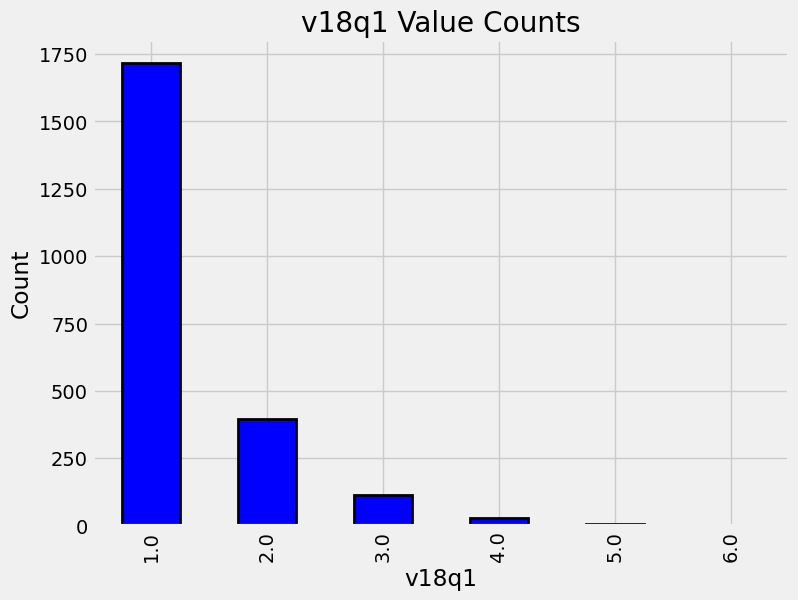

In [20]:
plot_value_counts(heads, 'v18q1')

It looks like the most common number of tablets to own is 1 if we go only by the data that is present. However, we also need to think about the data that is missing. In this case, it could be that families with a `nan` in this category just do not own a tablet! If we look at the data definitions, we see that `v18q` indicates whether or not a family owns a tablet. We should investigate this column combined with the number of tablets to see if our hypothesis holds.  
  
We can `groupby` the value of `v18q` (which is 1 for owns a tablet and 0 for does not) and then calculate the number of null values for `v18q1`. This will tell us if the null values represent that the family does not own a tablet.  
  
__DeepL 번역__  
현재 존재하는 데이터만 놓고 보면 가장 일반적인 태블릿 보유 대수는 1대인 것처럼 보입니다. 그러나 누락된 데이터에 대해서도 생각해 볼 필요가 있습니다. 이 경우, 이 카테고리에 `nan`이 있는 가족은 태블릿을 소유하고 있지 않을 수 있습니다! 데이터 정의를 살펴보면 `v18q`는 가족이 태블릿을 소유하고 있는지 여부를 나타냅니다. 이 열을 태블릿 수와 함께 조사하여 가설이 맞는지 확인해야 합니다.  
  
태블릿을 소유한 경우 1, 소유하지 않은 경우 0인 `v18q`의 값을 `groupby`한 다음 `v18q1`에 대한 null 값의 수를 계산할 수 있습니다. 이렇게 하면 해당 가족이 태블릿을 소유하고 있지 않음을 나타내는 null 값이 있는지 알 수 있습니다.

In [21]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

In [22]:
data['v18q1'] = data['v18q1'].fillna(0)

__v2a1__: Monthly rent payment  
  
The next missing column is `v2a1` which represents the montly rent payment.  
  
In addition to looking at the missing values of the monthly rent payment, it will be interesting to also look at the distribution of `tipovivi_`, the columns showing the ownership/renting status of the home. For this plot, we show the ownership status of those homes with a `nan` for the monthyl rent payment.  
  
__DeepL 번역__  
__v2a1__: 월 임대료 지불액  
  
다음으로 누락된 열은 월 임대료를 나타내는 `v2a1`입니다.  
  
월 임대료의 결측값을 살펴보는 것 외에도 주택의 소유/임차 상태를 나타내는 열인 `tipovivi_`의 분포도 살펴보는 것도 흥미로울 것입니다. 이 플롯에서는 월세 지불액이 `nan`인 주택의 소유 현황을 보여줍니다.  

In [23]:
for x in data:
    print(x)
    print(type(x))
    break

Id
<class 'str'>


Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

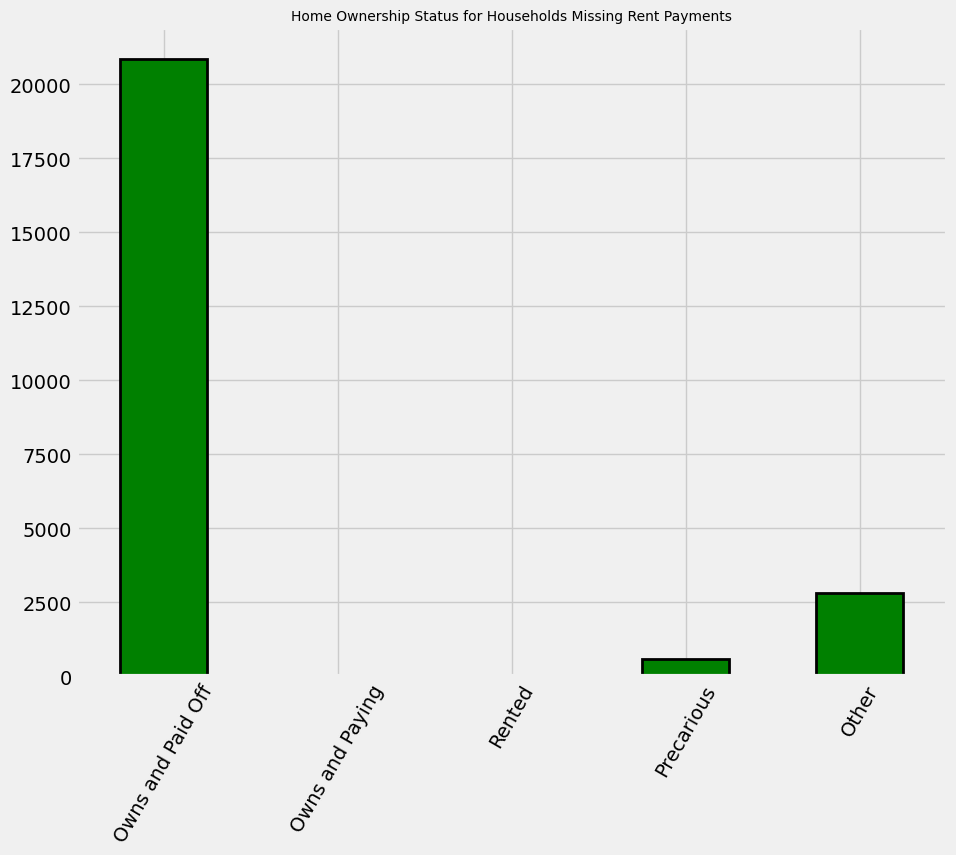

In [24]:
## Variables indicating home ownership
own_variables = [x for x in data if x.startswith('tipo')]
# str.startwith(v or (v1, vn)): 해당 str이 v로 시작 혹은 튜플 중 하나로 시작하는지 bool값 반환

## Plot of the home ownership variables for home missing rent payments
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize=(10,8),
                                                              color='green',
                                                              edgecolor='k',
                                                              linewidth=2)
plt.xticks([0,1,2,3,4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation=60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size=10)

The meaning of the home ownership variables is below:  
  
`tipovivi1, =1 own and fully paid house`  
`tipovivi2, "=1 own,  paying in installments"`  
`tipovivi3, =1 rented`  
`tipovivi4, =1 precarious`  
`tipovivi5, "=1 other(assigned,  borrowed)"`  
  
We've solved the issue! Well, mostly: the households that do not have a monthly rent payment generally own their own home. In a few other situations, we are not sure of the reason for the missing information.  
  
For the houses that are owned and have a missing monthly rent payment, we can set the value of the rent payment to zero. For the other homes, we can leave the missing values to be imputed but we'll add a flag (Boolean) column indicating that these households had missing values.  
  
__DeepL 번역__  
문제를 해결했습니다! 대부분 월 임대료를 지불하지 않는 가구는 일반적으로 자가 주택을 소유하고 있습니다. 몇 가지 다른 상황에서는 정보가 누락된 이유를 알 수 없습니다.  
  
소유하고 있지만 월 임대료가 누락된 주택의 경우 임대료 값을 0으로 설정할 수 있습니다. 다른 주택의 경우 누락된 값을 대입할 수 있지만 이러한 가구에 누락된 값이 있음을 나타내는 플래그(Boolen) 열을 추가할 수 있습니다.  

In [25]:
## Fill in households that own the house with 0 rent payment
data.loc[(data['tipovivi1']==1), 'v2a1'] = 0

## Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

v2a1-missing
False    29994
True      3419
Name: count, dtype: int64

__rez_esc__: years behind in school

The last column with a high percentage of missing values is `rez_esc` indicating years behind in school. For the families with a null value, is possible that they have no children currently in school. Let's test this out by finding the ages of those who have a missing value in this column and the ages of those who do not have a missing value.

__DeepL 번역__  
__rez_esc__: 학교를 늦게 졸업한 연도

누락된 값의 비율이 높은 마지막 열은 취학 연도를 나타내는 `rez_esc`입니다. 값이 0인 가족의 경우, 현재 학교에 다니는 자녀가 없을 가능성이 있습니다. 이 열에 결측값이 있는 사람의 나이와 결측값이 없는 사람의 나이를 구하여 이를 테스트해 보겠습니다.

In [26]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

What this tells us is that the oldest age with a missing value is 17. For anyone older than this, maybe we can assume that they are simply not in school. Let's look at the ages of those who have a missing value.  
  
__DeepL 번역__  
이를 통해 알 수 있는 것은 누락된 값이 있는 가장 오래된 연령이 17세라는 것입니다. 이보다 나이가 많은 사람은 단순히 학교에 다니지 않는다고 가정할 수 있습니다. 결측값이 있는 사람들의 나이를 살펴봅시다.

In [27]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

If we read through some of the [discussions for this competition](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403), we learn that this variable is only defined for individuals between 7 and 19. Anyone younger or older than this range presumably has no years behind and therefore the value should be set to 0. For this variable, if the individual is over 19 and they have a missing value, or if they are younger than 7 and have a missing value we can set it to zero. For anyone else, we'll leave the value to be imputed and add a boolean flag.  
  
__DeepL 번역__  
[이 대회에 대한 토론 내용](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)을 읽어보면 이 변수는 7세에서 19세 사이의 개인에 대해서만 정의된다는 것을 알 수 있습니다. 이 범위보다 어리거나 나이가 많은 사람은 아마도 연차가 없을 것이므로 값을 0으로 설정해야 합니다. 이 변수의 경우 개인이 19세 이상이고 누락된 값이 있거나 7세 미만이고 누락된 값이 있는 경우 0으로 설정할 수 있습니다. 그 외의 경우에는 값을 대입할 수 있는 상태로 두고 부울 플래그를 추가합니다.

In [28]:
## If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age']>19) | (data['age']<7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

## Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

There is also one outlier in the `rez_esc` column. Again, if we read through the competition discussions, we learn that the maximum value for this variable is 5. Therefore, any values above 5 should be set to 5.

In [29]:
data.loc[data['rez_esc']>5, 'rez_esc'] = 5

### Plot Two Categorical Variables
To show how two categorical variables interact with one another, there are a number of plotting options: scatterplots, faceted bar plots, boxplots, etc. I wasn't satisfied with any of these choices so I wrote the function below, which essentially is a scatterplot of two categoricals where the size of the points represent the percentage of a given y-value represented by each x-value.  
  
### DeepL 번역
두 범주형 변수가 서로 어떻게 상호 작용하는지 보여주기 위해 분산형 차트, 패싯 막대 차트, 박스형 차트 등 여러 가지 차트 옵션이 있습니다. 저는 이러한 옵션 중 어느 것도 만족스럽지 않아서 아래 함수를 작성했습니다. 이 함수는 기본적으로 점의 크기가 각 x값이 나타내는 주어진 y값의 백분율을 나타내는 두 범주형 변수의 산점도입니다.

In [30]:
def plot_categoricals(x, y, data, annotate=True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    ## Raw counts
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=False))
    raw_counts = raw_counts.rename(columns={'count': 'raw_count'})  # column명이 x와 다름

    ## Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=True))

    ## Rename the column and reset the index
    counts = counts.rename(columns={'proportion': 'normalized_count'}).reset_index()    # column명이 x와 다름
    counts['percent'] = 100*counts['normalized_count']

    ## Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])

    plt.figure(figsize=(14,10))
    ## Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor='k', color='lightgreen',
                s=100*np.sqrt(counts['raw_count']), marker='o',
                alpha=0.6, linewidths=1.5)
    
    if annotate:
        ## Annotate the plot with text
        for i, row in counts.iterrows():
            ## Put text with appropriate offsets
            plt.annotate(text=f"{round(row['percent'], 1)}%",   # s가 text로 바뀐듯
                         xy=(row[x]-(1/counts[x].nunique()),
                             row[y]-(0.15/counts[y].nunique())),
                        color='navy')
        
    ## Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())

    ## Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))

    ## 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max, int((sqr_max-sqr_min)/5)))
    markers = []

    ## Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s=100*size,
                                   label=f'{int(round(np.square(size)/100)*100)}',
                                   color='lightgreen',
                                   alpha=0.6, edgecolor='k', linewidths=1.5))
        
    ## Legend and formatting
    plt.legend(handles=markers, title='Counts',
               labelspacing=3, handletextpad=2,
               fontsize=16, loc=(1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy=(0,1), xycoords='figure points', size=10)
    
    ## Adjust axes limits
    plt.xlim((counts[x].min() - (6/counts[x].nunique()),
              counts[x].max() + (6/counts[x].nunique())))
    plt.ylim((counts[y].min() - (4/counts[y].nunique()),
              counts[y].max() + (4/counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{y} vs {x}');

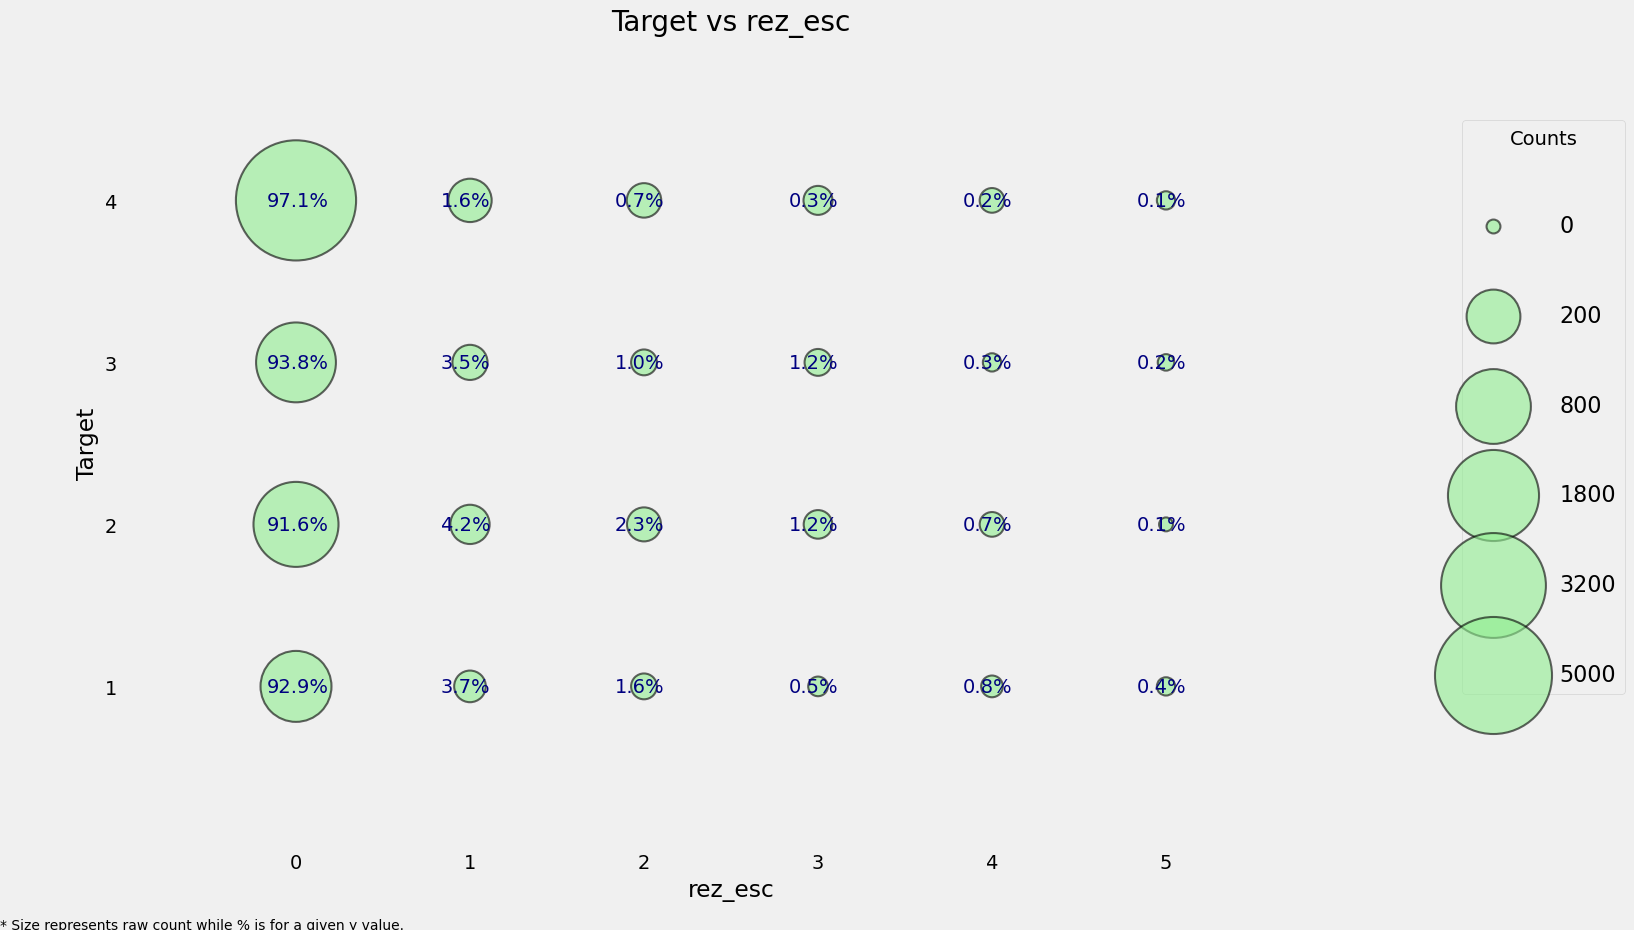

In [31]:
plot_categoricals('rez_esc', 'Target', data);

The size of the markers represents the raw count. To read the plot, choose a given y-value and then read across the row. For example, with a poverty level of 1, 93% of individuals have no years behind with a total count of around 800 individuals and about 0.4% of individuals are 5 years behind with about 50 total individuals in this category. This plot attempts to show both the overall counts and the within category proportion; it's not perfect , but I gave it a shot!  
  
__DeepL 번역__  
마커의 크기는 raw 개수를 나타냅니다. 그래프를 읽으려면 주어진 Y값을 선택한 다음 행을 가로질러 읽으면 됩니다. 예를 들어, 빈곤 수준이 1인 경우 93%의 개인은 연도가 뒤처지지 않으며 총 개수는 약 800명이고, 약 0.4%의 개인은 5년 뒤처지며 이 범주에 속하는 총 개수는 약 50명입니다. 이 플롯은 전체 수와 범주 내 비율을 모두 보여주기 위해 시도한 것으로, 완벽하지는 않지만 시도해 보았습니다!

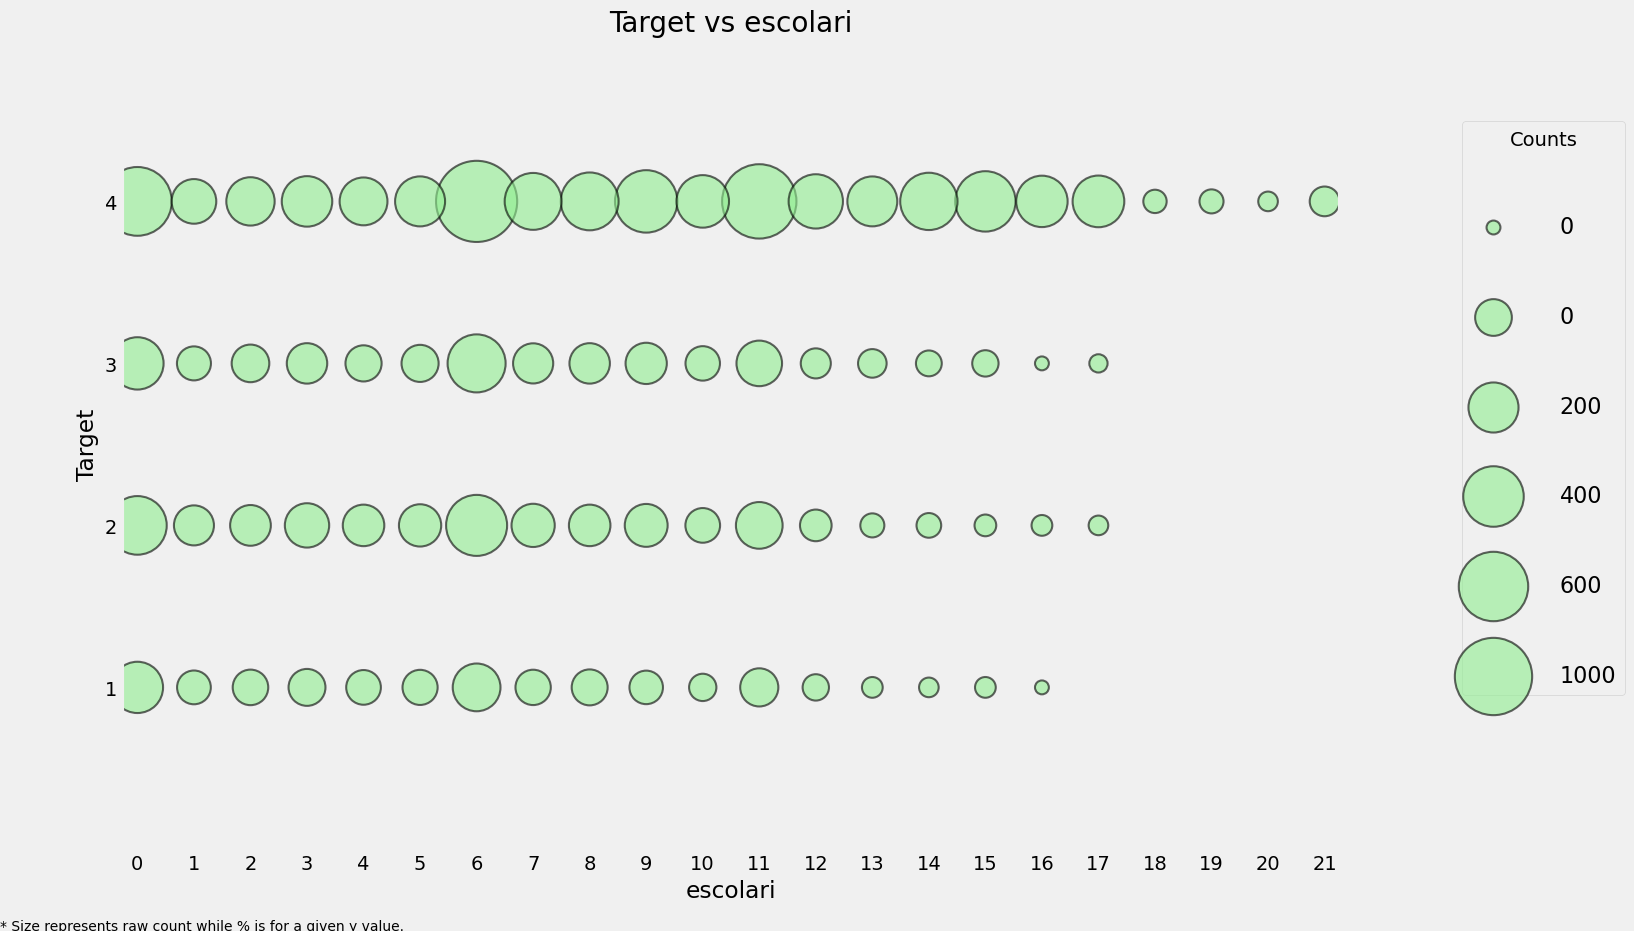

In [32]:
plot_categoricals('escolari', 'Target', data, annotate=False)

The remaining missing values in each column will be filled in, a process known as Imputation. There are several types of imputation commonly used, and one of the simplest and most effective methods is to fill in the missing values with the median of the column.  
  
As a final step with the missing values, we can plot the distribution of target for the case where either of these values are missing.  
  
__DeepL 번역__  
각 열의 나머지 결측값이 채워지는데, 이 과정을 대치라고 합니다. 일반적으로 사용되는 몇 가지 유형의 대입이 있으며, 가장 간단하고 효과적인 방법 중 하나는 열의 중앙값으로 누락된 값을 채우는 것입니다.  
  
누락된 값의 마지막 단계로, 두 값 중 하나가 누락된 경우에 대한 대상 분포를 그릴 수 있습니다.

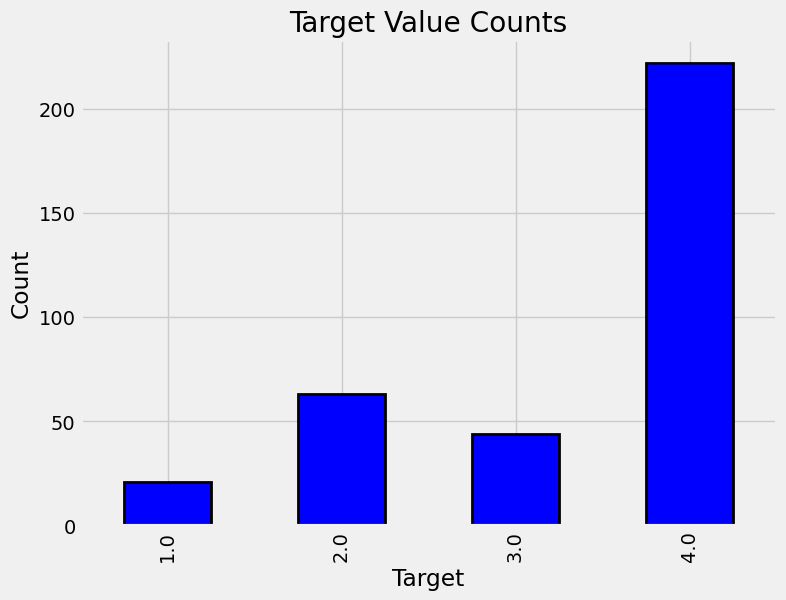

In [33]:
plot_value_counts(data[(data['rez_esc-missing']==1)], 'Target')

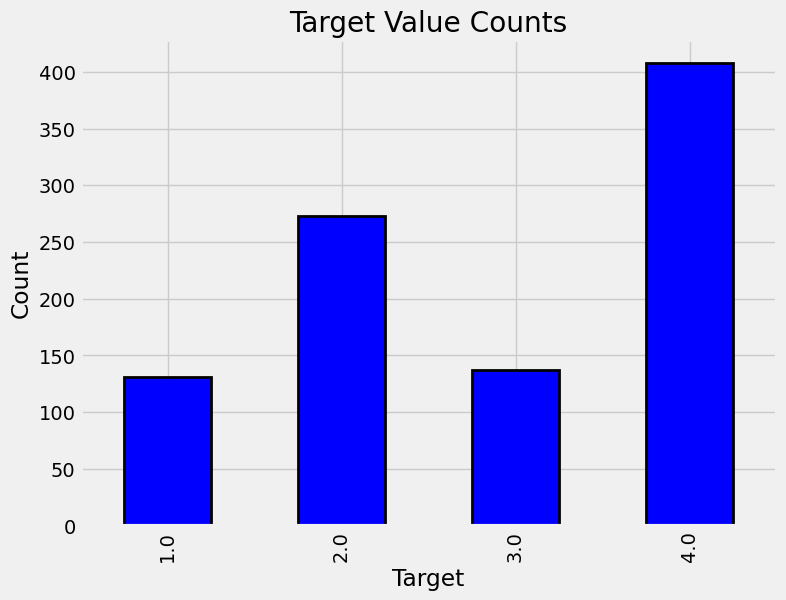

In [34]:
plot_value_counts(data[(data['v2a1-missing']==1)], 'Target')

This looks like it could be an indicator of more poverty given the higher prevalence of 2: moderate poverty.  
  
__This represents an important point__: sometimes the missing information is just as important as the information you are given.  
  
__DeepL 번역__  
이는 2번인 보통 빈곤의 유병률이 더 높다는 점에서 더 많은 빈곤을 나타내는 지표가 될 수 있는 것처럼 보입니다.  
  
__이것은 중요한 점을 나타냅니다__: 때로는 누락된 정보가 주어진 정보만큼이나 중요할 수 있습니다.

## Feature Engineering
There is plenty more exploratory data analysis we can do, but first we should work on consolidating our data at a household level. We already have some of the information for each household, but for training, we will need all of the information summarized for each household. This means grouping the individuals in a house (`groupby`) and performing an aggregation (`agg`) of the individual variables.  
  
In another notebook, I show how we can use automated feature engineering to do this, and __automated feature engineering__ should be a standard part of the machine learning workflow. Right now, we'll stick to doing this by hand, but definitely take a look at __automated feature engineering in Featuretools__.  
  
## DeepL 번역
더 많은 탐색적 데이터 분석을 할 수 있지만, 먼저 가구 수준에서 데이터를 통합하는 작업을 해야 합니다. 이미 각 가구에 대한 일부 정보가 있지만, 교육을 위해서는 각 가구에 대해 요약된 모든 정보가 필요합니다. 즉, 한 가구의 개인을 그룹화하고(`groupby`) 개별 변수의 집계(`agg`)를 수행해야 합니다.  
  
다른 노트북에서 자동화된 피처 엔지니어링을 사용하여 이 작업을 수행하는 방법을 보여드리며, __자동화된 피처 엔지니어링은__ 머신 러닝 워크플로우의 표준 부분이 되어야 합니다. 지금은 이 작업을 수작업으로 계속 진행하겠지만, Featuretools의 __자동화된 피처 엔지니어링을__ 꼭 살펴보세요.

### Column Definitions
Sometimes in data science we have to get our hands dirty digging through the data or do tedious tasks that take a lot of time. This is that part of the analysis: we have to define the columns that are at an individual level and at a household level using the [data decsriptions](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data). There is simply no other way to identify which variables at are the household level than to go through the variables themselves in the data description. Except, I've already done this for you, so all you have to do is copy and paste!  
  
We'll define different variables because we need to treat some of them in a different manner. Once we have the variables defined on each level, we can work to start aggregating them as needed.  
  
The process is as follows  
  
1. Break variables into household level and invididual level
2. Find suitable aggregations for the individual level data
    - Ordinal variables can use statistical aggregations
    - Boolean variables can also be aggregated but with fewer stats
3. Join the individual aggregations to the household level data
  
#### Define Variable Categories
There are several different categories of variables:  
  
1. Individual Variables: these are characteristics of each individual rather than the household
    - Boolean: Yes or No (0 or 1)
    - Ordered Discrete: Integers with an ordering
2. Household variables
    - Boolean: Yes or No
    - Ordered Discrete: Integers with an ordering
    - Continuous numeric
3. Squared Variables: derived from squaring variables in the data
4. Id variables: identifies the data and should not be used as features  
  
Below we manually define the variables in each category. This is a little tedious, but also necessary.

### DeepL 번역
데이터 과학에서는 때때로 데이터를 직접 손으로 파헤치거나 시간이 많이 걸리는 지루한 작업을 해야 할 때가 있습니다. 분석의 한 부분인 [데이터 설명](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data)을 사용하여 개인 수준과 가구 수준의 열을 정의해야 하는 경우가 여기에 해당합니다. 어떤 변수가 가구 수준인지 식별하는 방법은 데이터 설명에서 변수 자체를 살펴보는 것 외에 다른 방법이 없습니다. 하지만 제가 이미 이 작업을 수행했으므로 복사하여 붙여넣기만 하면 됩니다!  
  
일부 변수를 다른 방식으로 처리해야 하므로 다른 변수를 정의할 것입니다. 각 수준에서 변수를 정의하고 나면 필요에 따라 변수를 집계하는 작업을 시작할 수 있습니다.  
  
그 과정은 다음과 같습니다.  
  
1. 변수를 가구 수준과 불명확한 수준으로 나눕니다.
2. 개별 수준 데이터에 적합한 집계를 찾습니다.
    - 서수 변수는 통계 집계를 사용할 수 있습니다.
    - 부울 변수도 집계할 수 있지만 더 적은 수의 통계로 집계할 수 있습니다.
3. 개별 집계를 가구 수준 데이터에 조인합니다.
  
#### 변수 카테고리 정의
변수에는 여러 가지 카테고리가 있습니다:  
  
1. 개인 변수: 가구가 아닌 각 개인의 특성입니다.
    - 부울: 예 또는 아니오(0 또는 1)
    - 정렬된 이산형: 순서가 있는 정수
2. 가구 변수
    - 부울: 예 또는 아니요
    - 순서가 지정된 불연속형: 순서가 지정된 정수
    - 연속형 숫자
3. 제곱 변수: 데이터의 변수를 제곱하여 파생된 변수
4. ID 변수: 데이터를 식별하며 기능으로 사용해서는 안 됩니다.  
  
아래에서는 각 카테고리의 변수를 직접 정의합니다. 이 과정은 다소 지루하지만 꼭 필요한 작업입니다.

In [35]:
id_ = ['Id', 'idhogar', 'Target']

In [36]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [37]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [38]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [39]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats:', np.all(np.array(list(Counter(x).values()))==1))
print('We covered every variable: ', len(x)==data.shape[1])

There are no repeats: True
We covered every variable:  True


__Squared Variables__  
First, the easiest step: we'll remove all of the squared variables. Sometimes variables are squared or transformed as part of feature engineering because it can help linear models learn relationships that are non-linear. However, since we will be using more complex models, these squared features are redundant. They are highly correlated with the non-squared version, and hence can actually hurt our model by adding irrelevant information and also slowing down training.  
  
For an example, let's take a look at `SQBage` vs `age`.  
  
__DeepL 번역__  
먼저 가장 쉬운 단계로 제곱된 변수를 모두 제거합니다. 선형 모델이 비선형적인 관계를 학습하는 데 도움이 될 수 있기 때문에 피처 엔지니어링의 일부로 변수를 제곱하거나 변형하는 경우가 있습니다. 그러나 더 복잡한 모델을 사용할 것이므로 이러한 제곱된 특징은 중복됩니다. 제곱된 피처는 제곱되지 않은 피처와 상관관계가 높기 때문에 관련 없는 정보를 추가하고 학습 속도를 늦춤으로써 실제로 모델에 해를 끼칠 수 있습니다.  
  
예를 들어 `SQBage`와 `age`를 살펴보겠습니다.

c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


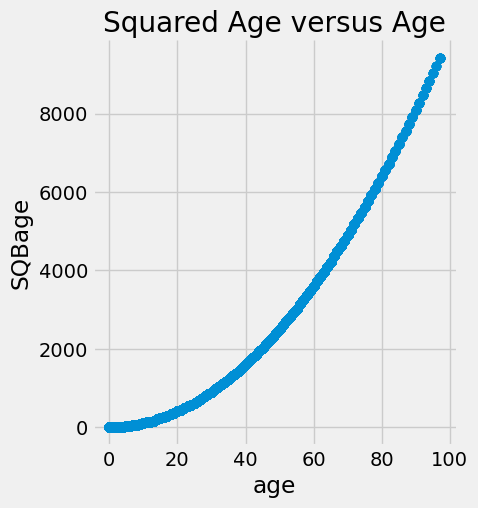

In [40]:
sns.lmplot(data=data, x='age', y='SQBage', fit_reg=False)
plt.title('Squared Age versus Age');

In [41]:
sqr_

['SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned',
 'agesq']

In [42]:
## Remove squared variables
data = data.drop(columns=sqr_)
# sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
data.shape

(33413, 136)

### Id Variables
These are pretty simple: they will be kept as is in the data since we need them for identification.

### Household Level Variables
First let's subset to the heads of household and then to the household level variables.

In [43]:
# heads = data.loc[data['parentesco1']==1, :]
heads = data.loc[data['parentesco1']==1]    # 상동
heads = heads[id_+hh_bool+hh_cont+hh_ordered]
heads.shape

(10307, 99)

For most of the household level variables, we can simply keep them as is: since we want to make predictions for each household, we use these variables as features. However, we can also remove some redundant variables and also add in some more features derived from existing data.  
  
__Redundant Household Variables__  
Let's take a look at the correlations between all of the household variables. If there are any that are too highly correlated, then we might want to remove one of the pair of highly correlated variables.  
  
The following code identifies any variables with a greater than 0.95 absolute magnitude correlation.  
  
__DeepL 번역__  
대부분의 가구 수준 변수는 그대로 유지하면 됩니다. 각 가구에 대한 예측을 하고 싶기 때문에 이러한 변수를 기능으로 사용합니다. 그러나 일부 중복 변수를 제거하고 기존 데이터에서 파생된 몇 가지 기능을 추가할 수도 있습니다.  
  
__중복되는 가구 변수__  
모든 가구 변수 간의 상관관계를 살펴봅시다. 상관관계가 너무 높은 변수가 있는 경우 상관관계가 높은 변수 쌍 중 하나를 제거할 수 있습니다.  
  
다음 코드는 절대 크기 상관관계가 0.95보다 큰 변수를 식별합니다.

In [44]:
## Create correlation matrix
corr_matrix = heads.corr(numeric_only=True)

## Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# np.triu: 상삼각행렬로 변환, k=기준
# df.where: 거짓값 대치

## Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [45]:
# These show one out of each pair of correlated variables. To find the other pair, we can subset the `corr_matrix`.

corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


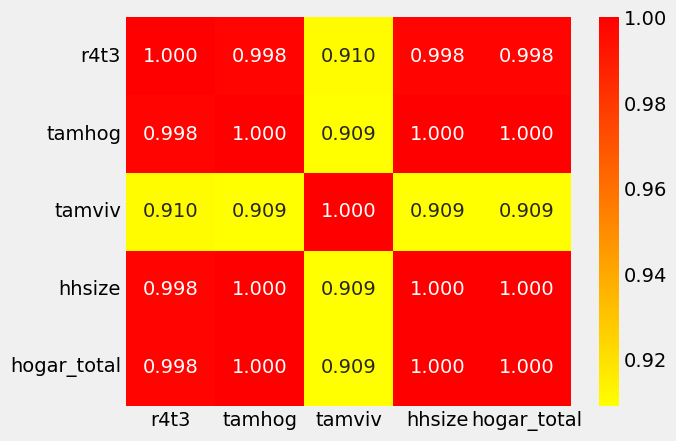

In [46]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9],
            annot=True, cmap=plt.cm.autumn_r, fmt='.3f');
# matplotlib 3.8(24.02.10. 기준 최신)버전은 annot가 첫 행만 나오는 문제가 있어 3.7로 다운그레이드 해야 함.

There are several variables here having to do with the size of the house:  
  
- r4t3, Total persons in the household
- tamhog, size of the household
- tamviv, number of persons living in the household
- hhsize, household size
- hogar_total, # of total individuals in the household
  
These variables are all highly correlated with one another. In fact, `hhsize` has a perfect correlation with `tamhog` and `hogar_total`. We will remove these two variables because the information is redundant. We can also remove `r4t3` because it has a near perfect correlation with `hhsize`.  
  
`tamviv` is not necessarily the same as `hhsize` because there might be family members that are not living in the household. Let's visualize this difference in a scatterplot.  
  
__DeepL번역__  
여기에는 집의 크기와 관련된 몇 가지 변수가 있습니다:  
  
- r4t3, 가구 내 총 인원수
- tamhog, 가구의 크기
- tamviv, 가구 내 거주 인원 수
- hhsize, 가구 크기
- hogar_total, 가구 내 총 개인 수
  
이러한 변수는 모두 서로 높은 상관관계를 가지고 있습니다. 실제로 `hhsize`는 `tamhog` 및 `hogar_total`과 완벽한 상관 관계를 갖습니다. 이 두 변수는 정보가 중복되므로 제거하겠습니다. 또한 `r4t3`은 `hhsize`와 거의 완벽한 상관 관계를 가지므로 제거할 수 있습니다.  
  
`tamviv`는 가구에 거주하지 않는 가족 구성원이 있을 수 있으므로 `hhsize`와 반드시 같을 수는 없습니다. 이 차이를 분산형 차트로 시각화해 보겠습니다.

In [47]:
heads = heads.drop(columns=['tamhog', 'hogar_total', 'r4t3'])

c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


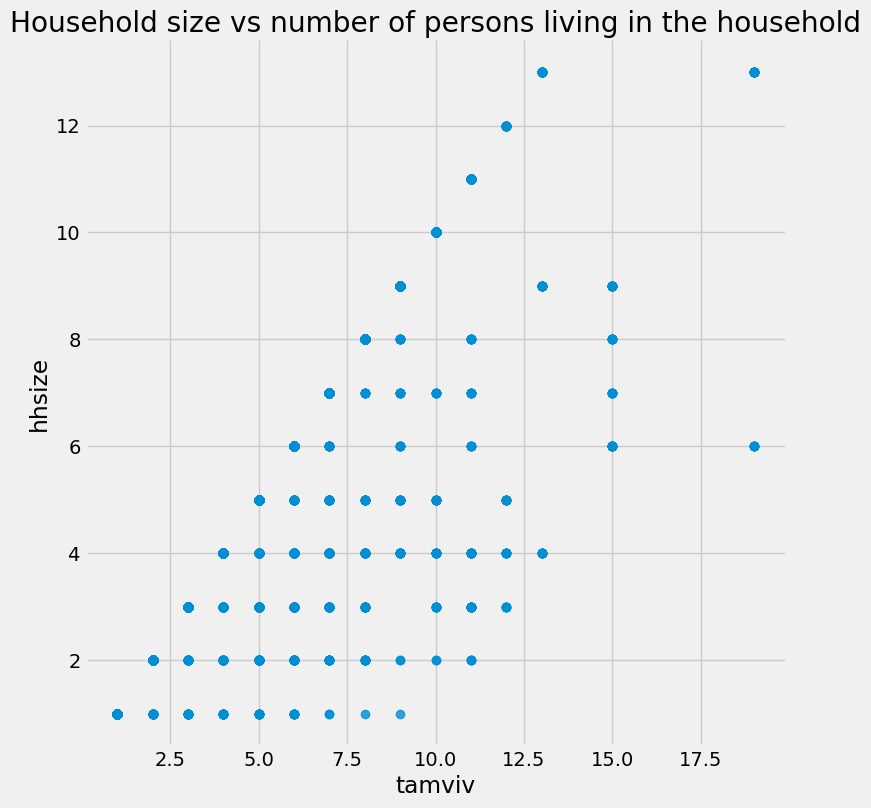

In [48]:
sns.lmplot(data=data, x='tamviv', y='hhsize', fit_reg=False, height=8)
plt.title('Household size vs number of persons living in the household');

We see for a number of cases, there are more people living in the household than there are in the family. This gives us a good idea for a new feature: __the difference between these two measurements!__  
  
Let's make this new feature.  
  
__DeepL 번역__  
가족 구성원 수보다 더 많은 사람이 함께 사는 경우가 많습니다. 이는 새로운 기능에 대한 좋은 아이디어를 제공합니다: __이 두 측정값의 차이!__  
  
이 새로운 기능을 만들어 봅시다.

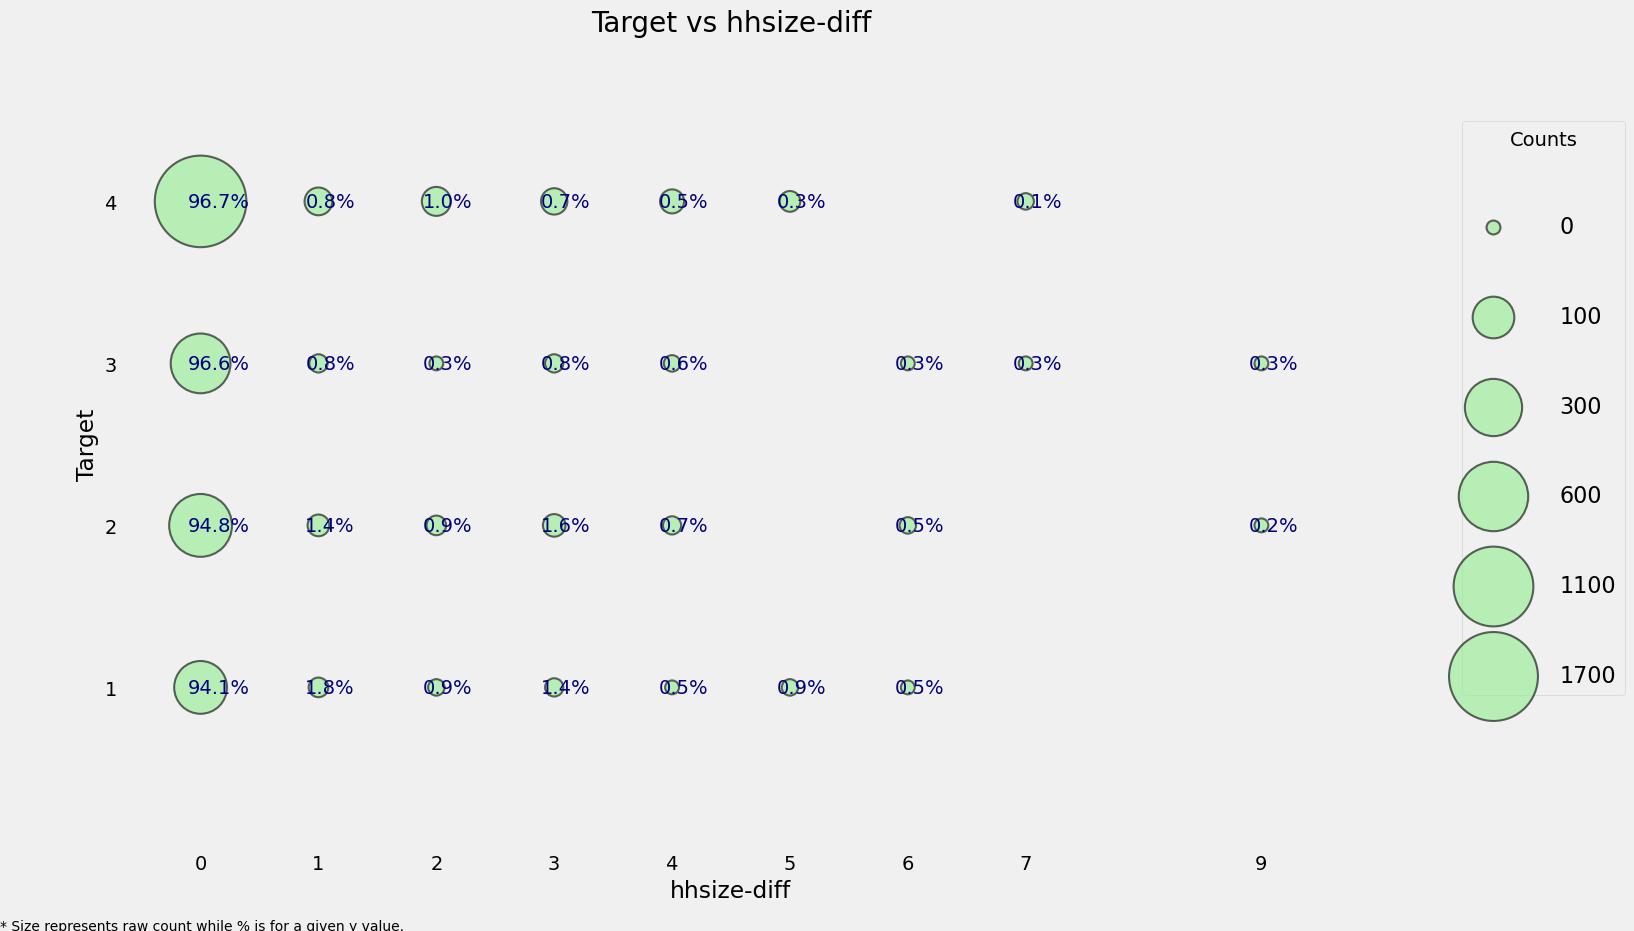

In [49]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

Even though most households do not have a difference, there are a few that have more people living in the household than are members of the household.

Let's move on to the other redundant variables. First we can look at `coopele`

In [50]:
corr_matrix.loc[corr_matrix['coopele'].abs()>0.9, corr_matrix['coopele'].abs()>0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


These variables indicate where the electricity in the home is coming from. There are four options, and the families that don't have one of these two options either have no electricity (`noelec`) or get it from a private plant (`planpri`).

#### Creating Ordinal Variable
I'm going to compress these four variables into one by creating an ordinal variable. I'm going to choose the mapping myself, based on the data decriptions:  
  
`0: No electricity`  
`1: Electricity from cooperative`  
`2: Electricity from CNFL, ICA, ESPH/JASEC`  
`3: Electricity from private plant`  
  
An ordered variable has an inherent ordering, and for this we choose our own based on the domain knowledge. After we create this new ordered variable, we can drop the four others. There are several households that do not have a variable here, so we will use a `nan` (which will be filled in during imputation) and add a Boolean column indicating there was no measure for this variable.  
  
#### DeepL 번역
서수 변수를 생성하여 이 네 가지 변수를 하나로 압축하겠습니다. 데이터 설명에 따라 매핑을 직접 선택하겠습니다:  
  
`0: 전기 없음`  
`1: cooperative의 전기`  
`2: CNFL, ICA, ESPH/JASEC의 전기`  
`3: 민간 발전소의 전기`  
  
정렬된 변수는 고유한 순서를 가지며, 이를 위해 도메인 지식을 기반으로 자체적으로 순서를 선택합니다. 이 새로운 정렬 변수를 생성한 후에는 다른 네 개의 변수를 삭제할 수 있습니다. 여기에는 변수가 없는 가구가 여러 개 있으므로 `nan`(대입 중에 채워질 것임)을 사용하고 이 변수에 대한 측정값이 없음을 나타내는 부울 열을 추가합니다.

In [51]:
elec = []

## Assign values
for i, row in heads.iterrows():
    if row['noelec']==1:
        elec.append(0)
    elif row['coopele']==1:
        elec.append(1)
    elif row['public']==1:
        elec.append(2)
    elif row['planpri']==1:
        elec.append(3)
    else:
        elec.append(np.nan)

## Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()
## head = heads.drop(columns=['noelec', 'coopele', 'public', 'planpri'])   

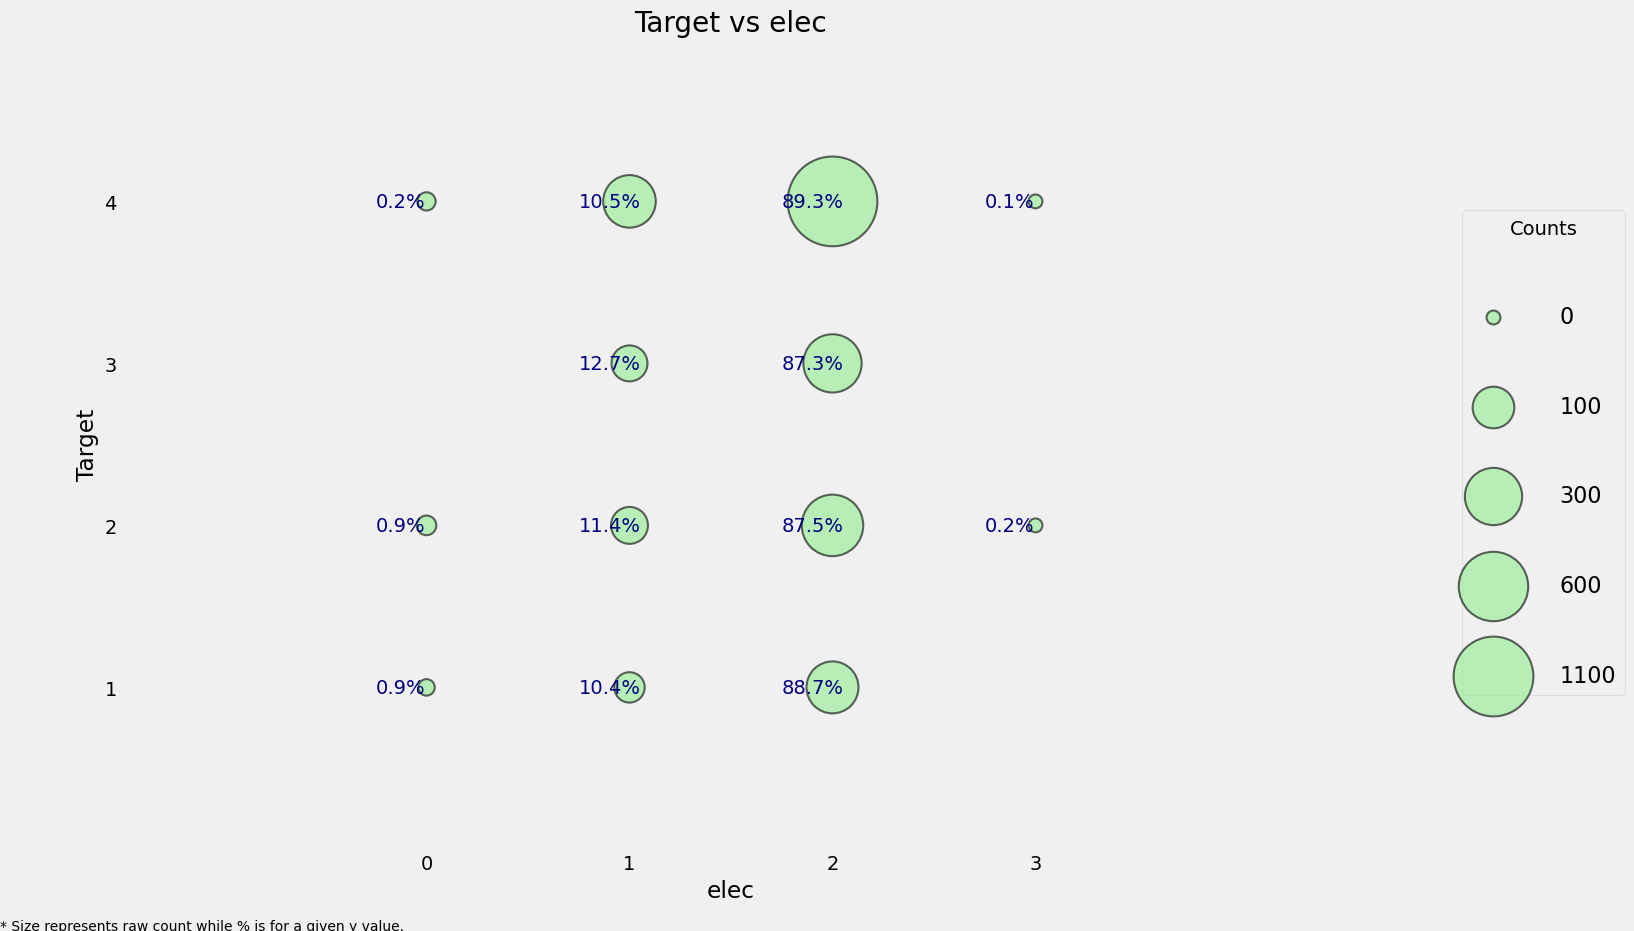

In [52]:
plot_categoricals('elec', 'Target', heads)

We can see that for every value of the Target, the most common source of electricity is from one of the listed providers.  
  
The final redundant column is `area2`. This means the house is in a rural zone, but it's redundant because we have a column indicating if the house is in a urban zone. Therefore, we can drop this column.
  
__DeepL 번역__  
Target의 모든 값에 대해 가장 일반적인 전력 공급원은 나열된 공급업체 중 하나라는 것을 알 수 있습니다.  
  
마지막 중복 열은 'area2'입니다. 이는 집이 시골 지역에 있다는 것을 의미하지만, 집이 도시 지역에 있는지를 나타내는 열이 있기 때문에 중복됩니다. 따라서 이 열을 삭제할 수 있습니다.

In [53]:
heads = heads.drop(columns='area2')

heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: proportion, dtype: float64

It seems like households in an urban area (value of 1) are more likely to have lower poverty levels than households in a rural area (value of 0).  
  
### Creating Ordinal Variables
For the walls, roof, and floor of the house, there are three columns each: the first indicating 'bad', the second 'regular', and the third 'good'. We could leave the variables as booleans, but to me it makes more sense to turn them into ordinal variables because there is an inherent order: `bad < regular < good`. To do this, we can simply find whichever column is non-zero for each household using `np.argmax`.  
  
Once we have created the ordinal variable, we are able to drop the original variables.  
  
### DeepL 번역
도시 지역(값 1)의 가구가 농촌 지역(값 0)의 가구보다 빈곤 수준이 낮을 가능성이 더 높은 것으로 보입니다.  
  
### 서수 변수 만들기
집의 벽, 지붕, 바닥에 대해 각각 세 개의 열이 있는데, 첫 번째 열은 '나쁨', 두 번째 열은 '보통', 세 번째 열은 '좋음'을 나타냅니다. 변수를 부울로 남겨둘 수도 있지만, 나쁜 <일반 <좋은 순서가 내재되어 있기 때문에 서수 변수로 바꾸는 것이 더 합리적입니다. 이렇게 하려면 np.argmax를 사용하여 각 가구에서 0이 아닌 열을 간단히 찾을 수 있습니다.  
  
서수 변수를 생성한 후에는 원래 변수를 삭제할 수 있습니다.

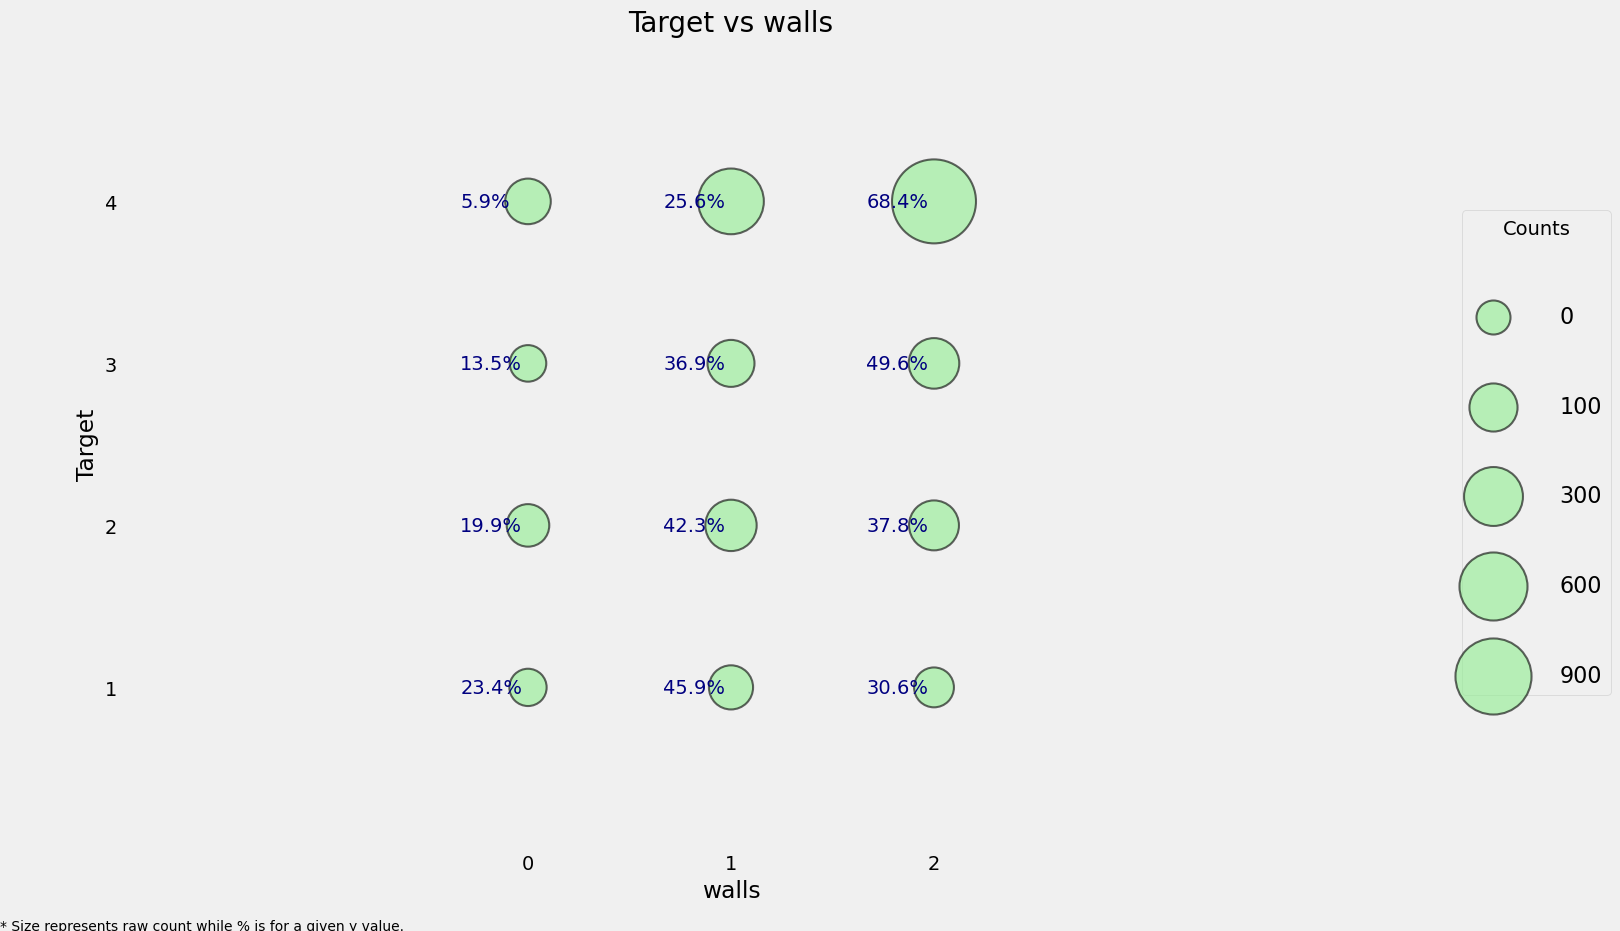

In [54]:
## Wall ordinal variable
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis=1)

## heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])
plot_categoricals('walls', 'Target', heads)

In [55]:
## Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                          axis=1)
heads = heads.drop(columns=['etecho1', 'etecho2', 'etecho3'])

## Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis=1)
## heads = heads.drop(columns = ['eviv1'], 'eviv2', 'eviv3'])

### Feature Construction

In addition to mapping variables to ordinal features, we can also create entirely new features from the existing data, known as feature construction. For example, we can add up the previous three features we just created to get an overall measure of the quality of the house's structure.  
  
### DeepL 번역
변수를 서수형 특징에 매핑하는 것 외에도 기존 데이터에서 완전히 새로운 특징을 만들 수 있는데, 이를 특징 구성이라고 합니다. 예를 들어, 방금 만든 세 가지 특징을 합산하여 집의 구조 품질에 대한 전반적인 측정값을 얻을 수 있습니다.

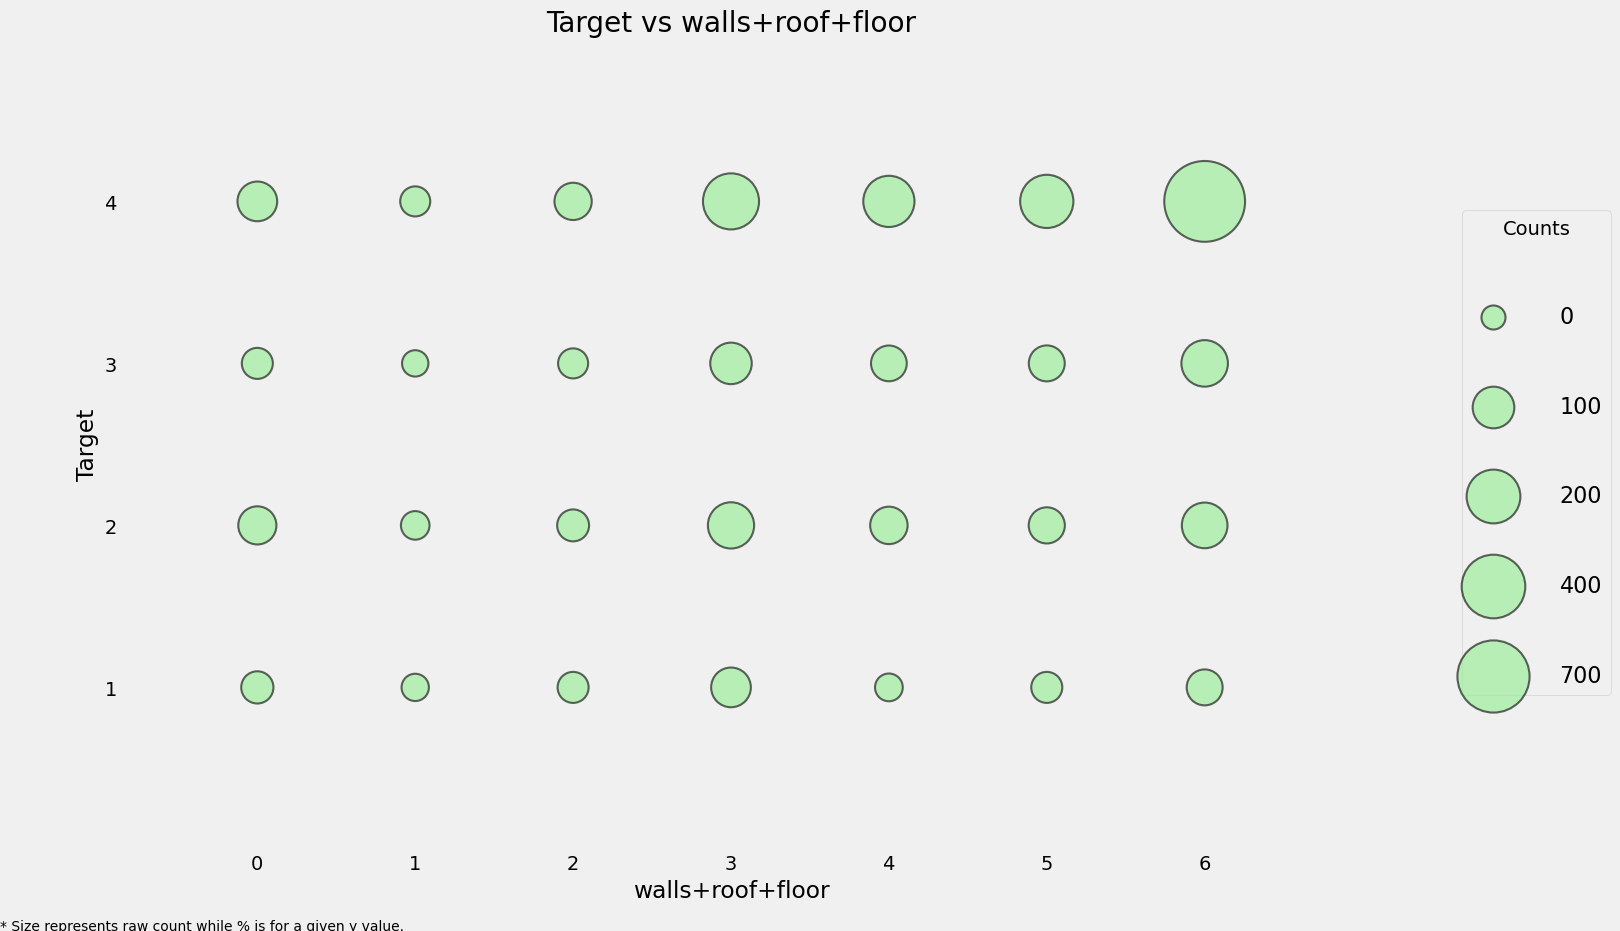

In [56]:
## Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']
# heads['walls+roof+floor'] = heads[['walls', 'roof', 'floor']].sum(axis=1) # 이렇게 해도 된다.

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

This new feature may be useful because it seems like a Target of 4 (the lowest poverty level) tends to have higher values of the 'house quality' variable. We can also look at this in a table to get the fine-grained details.  
  
__DeepL 번역__  
이 새로운 기능은 목표가 4(최저 빈곤 수준)인 경우 '주택 품질' 변수의 값이 더 높은 경향이 있기 때문에 유용할 수 있습니다. 또한 이를 표로 표시하여 세분화된 세부 정보를 얻을 수도 있습니다.

In [57]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize=True)).rename(columns={'Target': 'Normalized Count'}).reset_index()
counts.head()

,walls+roof+floor,Target,proportion
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


The next variable will be a `warning` about the quality of the house. It will be a negative value, with -1 point each for no toilet, electricity, floor, water service, and ceiling.  
  
__DeepL 번역__  
다음 변수는 집의 품질에 대한 `warning`입니다. 화장실, 전기, 바닥, 수도, 천장이 없는 경우 각각 -1점의 음수 값으로 표시됩니다.

In [58]:
## No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1']+
                        (heads['elec']==0)+
                         heads['pisonotiene']+
                         heads['abastaguano']+
                         (heads['cielorazo']==0))

We can keep using our `plot_categoricals` function to visualize these relationships, but `seaborn` also has a number of plotting options that can work with categoricals. One is the `violinplot` which shows the distribution of a variable on the y axis with the width of each plot showing the number of observations in that category.  
  
__DeepL 번역__  
이러한 관계를 시각화하기 위해 `plot_categoricals` 함수를 계속 사용할 수 있지만, `seaborn`에는 범주형에 사용할 수 있는 여러 가지 플롯 옵션도 있습니다. 그 중 하나는 `violinplot`으로, 각 플롯의 너비가 해당 범주의 관측 횟수를 나타내는 Y축에 변수의 분포를 표시합니다.

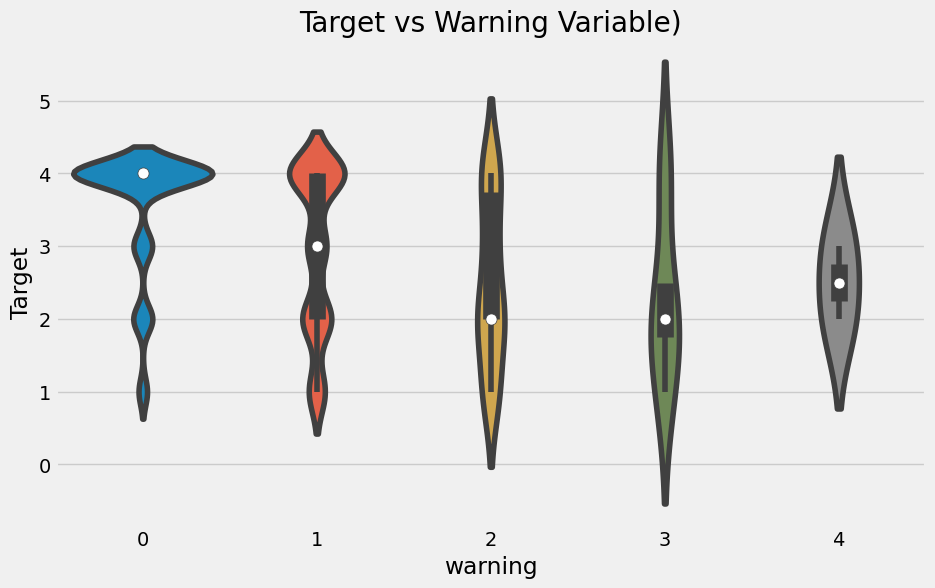

In [59]:
plt.figure(figsize=(10,6))
sns.violinplot(x='warning', y='Target', data=heads)
plt.title('Target vs Warning Variable)');

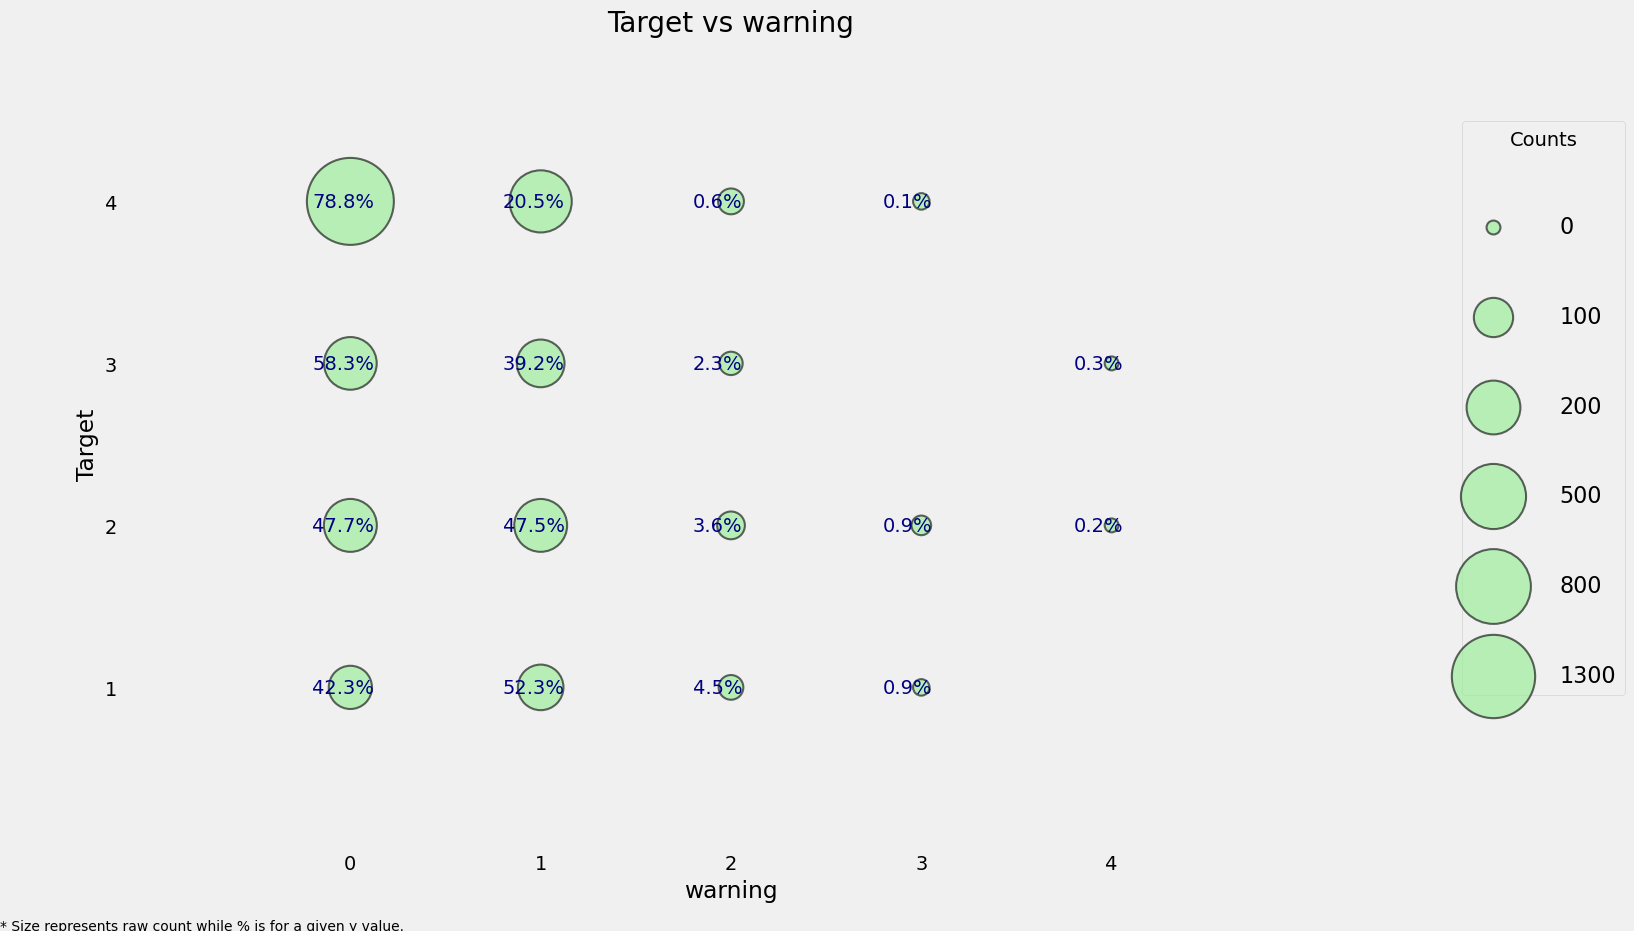

In [60]:
plot_categoricals('warning', 'Target', data=heads)

The violinplot is not great here because it smooths out the categorical variable with the effect that it looks as if the Target can take on lesser and greater values than in reality. Nonetheless, we can see a high concentration of households that have no warning signs and have the lowest level of poverty. It looks as if this may be a useful feature, but we can't know for sure until we get to modeling!  
  
The final household feature we can make for now is a `bonus` where a family gets a point for having a refrigerator, computer, tablet, or television.  
  
__DeepL 번역__  
바이올린 플롯은 범주형 변수를 평활화하여 목표가 실제보다 작거나 큰 값을 가질 수 있는 것처럼 보이게 하는 효과가 있기 때문에 여기서 그다지 좋은 방법은 아닙니다. 그럼에도 불구하고 경고 신호가 없고 빈곤 수준이 가장 낮은 가구가 집중되어 있는 것을 볼 수 있습니다. 이 기능이 유용한 기능인 것처럼 보이지만 모델링을 해봐야 확실히 알 수 있습니다!  
  
마지막 household 피쳐로 우리는 이제 `bonus`로써 냉장고, 컴퓨터, 태블릿 또는 TV를 보유한 가구에 점수를 부여할 수 있습니다.

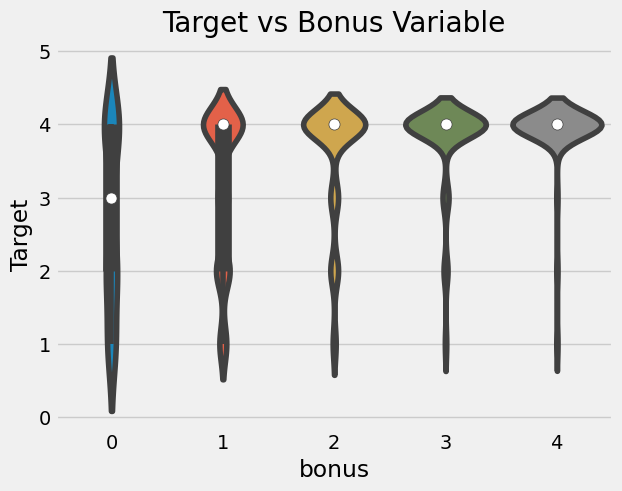

In [61]:
## Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1*(heads['refrig']+
                    heads['computer']+
                    (heads['v18q1']>0)+
                    heads['television'])

sns.violinplot(data=heads, x='bonus', y='Target',
               figsize=(10,6))
plt.title('Target vs Bonus Variable');

### Per Capita Features
Additional features we can make calculate the number of certain measurements for each person in the house hold.

In [62]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

### Exploring Household Variables
After going to all the trouble of getting our features in order, now we can take a look at them in relation to the Target. We've already done a little of this, but now we can try to quantify relationships.  
  
__Measuring Relationships__  
There are many ways for measuring relationships between two variables. Here we will examine two of these: 
  
1. The Pearson Correlation: from -1 to 1 measuring the linear relationship between two variables
2. The Spearman Correlation: from -1 to 1 measuring the monotonic relationship between two variables
  
The Spearman correlation is 1 if as one variable increases, the other does as well, even if the relationship is not linear. On the other hand, the Pearson correlation can only be one if the increase is exactly linear. These are best illustrated by example.  
  
### DeepL 번역

In [63]:
from scipy.stats import spearmanr

In [64]:
def plot_corrs(x, y):
    """Plot data and show the spearman and pearson correlation."""

    ## Calculate coreelations
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]

    ## Scatter plot
    data = pd.DataFrame({'x': x, 'y': y})
    plt. figure(figsize=(6,4))
    sns.regplot(data=data, x='x', y='y', fit_reg=False)
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

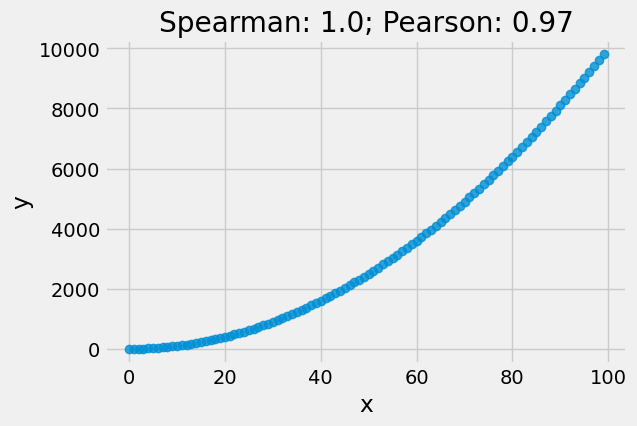

In [65]:
x = np.array(range(100))
y = x**2

plot_corrs(x, y)

The Spearman correlation is often considered to be better for ordinal variables such as the Target or the years of education. Most relationshisp in the real world aren't linear, and although the Pearson correlation can be an approximation of how related two variables are, it's inexact and not the best method of comparison.  
  
__DeepL 번역__  

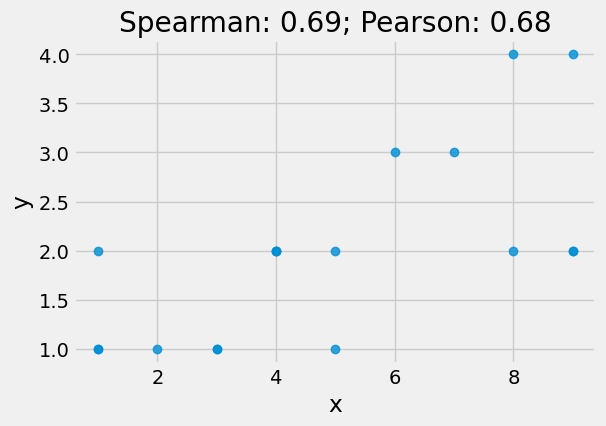

In [66]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

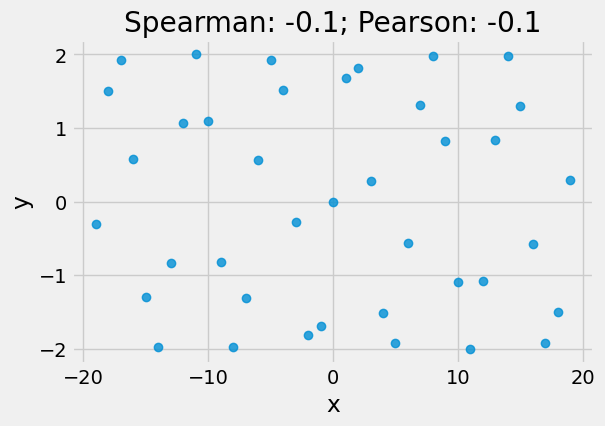

In [67]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)

In [68]:
## First, we'll calculate the Pearson correlation of every variable with the Target.

## Use only training data
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr(numeric_only=True)['Target'].sort_values()).rename(columns={'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns={'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


For the negative correlations, as we increase the variable, the Target decreases indicating the poverty severity increases. Therefore, as the warning increases, the poverty level also increases which makes sense because this was meant to show potential bad signs about a house. The hogar_nin is the number of children 0 - 19 in the family which also makes sense: younger children can be financial source of stress on a family leading to higher levels of poverty. Or, families with lower socioeconomic status have more children in the hopes that one of them will be able to succeed. Whatever the explanation, there is a [real link between family size and poverty](https://www.adb.org/sites/default/files/publication/157217/adbi-rp68.pdf)  
  
On the other hand, for the positive correlations, a higher value means a higher value of Target indicating the poverty severity decreases. The most highly correlated household level variable is meaneduc, the average education level of the adults in the household. This relationship between education and poverty intuitively makes sense: [greater levels of education generally correlate with lower levels of poverty](https://www.childfund.org/poverty-and-education/). We don't necessarily know which causes which, but we do know these tend to move in the same direction.  
  
The general guidelines for correlation values are below, but these will change depending on who you ask ([source](https://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) for these):
  
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”
  
What these correlations show is that there are some weak relationships that hopefully our model will be able to use to learn a mapping from the features to the Target.  
  
Now we can move on to the Spearman correlation.  
  
__DeepL 번역__  
음의 상관관계의 경우, 변수가 증가하면 목표가 감소하여 빈곤의 심각성이 증가함을 나타냅니다. 따라서 경고가 증가함에 따라 빈곤 수준도 증가하는데, 이는 집에 대한 잠재적인 나쁜 징후를 보여주기 위한 것이므로 의미가 있습니다. 호가_닌은 가족 내 0~19세 자녀 수로, 어린 자녀가 많을수록 가족의 경제적 스트레스가 커져 빈곤 수준이 높아질 수 있다는 점에서 의미가 있습니다. 또는 사회경제적 지위가 낮은 가정에서는 자녀 중 한 명이 성공할 수 있기를 바라며 더 많은 자녀를 낳을 수도 있습니다. 설명이 무엇이든, [가족 규모와 빈곤 사이에는 실제 연관성](https://www.adb.org/sites/default/files/publication/157217/adbi-rp68.pdf)이 있습니다.  
  
반면에 양의 상관관계의 경우, 값이 높을수록 빈곤의 심각성이 감소함을 나타내는 목표 값이 높다는 것을 의미합니다. 가장 상관관계가 높은 가구 수준 변수는 가구 내 성인의 평균 교육 수준인 평균 학력입니다. 교육 수준과 빈곤의 관계는 직관적으로 이해할 수 있습니다: [일반적으로 교육 수준이 높을수록 빈곤 수준이 낮습니다](https://www.childfund.org/poverty-and-education/). 어떤 것이 어떤 원인인지는 정확히 알 수 없지만, 같은 방향으로 움직이는 경향이 있다는 것은 알 수 있습니다.  
  
상관관계 값에 대한 일반적인 가이드라인은 아래와 같지만, 질문하는 사람에 따라 달라질 수 있습니다([출처](https://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) 참조):
  
- .00-.19 "매우 약함"
- .20-.39 "약함"
- .40-.59 "보통"
- .60-.79 "강함"
- .80-1.0 "매우 강함"
  
이러한 상관 관계에서 알 수 있는 것은 모델이 기능에서 Target으로의 매핑을 학습하는 데 사용할 수 있는 몇 가지 약한 관계가 있다는 것입니다.  
  
이제 스피어만 상관관계로 넘어가겠습니다.

In [69]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

feats = []
scorr = []
pvalues = []

## Iterate through each column
for c in heads:
    ## Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)

        ## Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

The Spearman correlation coefficient calculation also comes with a pvalue indicating the significance level of the relationship. Any pvalue less than 0.05 is genearally regarded as significant, although since we are doing multiple comparisons, we want to divide the p-value by the number of comparisons, a process known as the Bonferroni correction.  
  
__DeepL 번역__  
스피어만 상관관계 계수 계산에는 관계의 유의 수준을 나타내는 p값도 함께 제공됩니다. 일반적으로 0.05 미만의 p값은 유의미한 것으로 간주되지만, 여러 비교를 수행하기 때문에 본페로니 보정이라고 하는 과정을 통해 p값을 비교 수로 나누고자 합니다.

In [70]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [71]:
## For the most part, the two methods of calculating correlations are in agreement. 
## Just out of curiousity, we can look for the values that are furthest apart.

corrs = pcorrs.merge(scorrs, on='feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
77,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
85,v18q1,0.197493,0.244200,1.282664e-41,-0.046708
87,tablets-per-capita,0.204638,0.248642,3.951568e-43,-0.044004
2,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
97,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351


In [72]:
corrs.sort_values('diff').dropna().tail()

,feature,pcorr,scorr,pvalue,diff
57,techozinc,0.014357,0.003404,8.528369e-01,0.010954
49,hogar_mayor,-0.025173,-0.041722,2.290994e-02,0.016549
88,edjefe,0.235687,0.214736,2.367521e-32,0.020951
66,edjefa,0.052310,0.005114,7.804715e-01,0.047197
17,dependency,-0.126465,-0.281516,2.792620e-55,0.155051


The largest discrepancy in the correlations is `dependency`. We can make a scatterplot of the `Target` versus the `dependency` to visualize the relationship. We'll add a little jitter to the plot because these are both discrete variables.  
  
__DeeL 번역__  
상관관계에서 가장 큰 불일치는 `dependency`입니다. 관계를 시각화하기 위해 `Target` 대 `dependency`의 산점도를 만들 수 있습니다. 이 두 변수는 불연속형 변수이므로 플롯에 약간의 지터를 추가하겠습니다.

c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


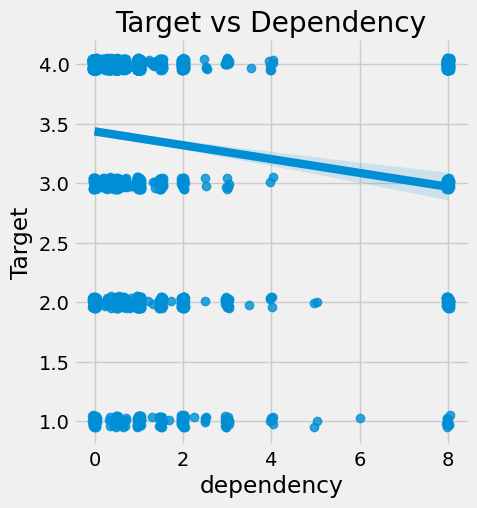

In [73]:
sns.lmplot(data=train_heads, x='dependency', y='Target', fit_reg=True, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Dependency');

It's hard to see the relationship, but it's slightly negative: as the `dependency` increases, the value of the `Target` decreases. This makes sense: the `dependency` is the number of dependent individuals divided by the number of non-dependents. As we increase this value, the poverty severty tends to increase: having more dependent family members (who usually are non-working) leads to higher levels of poverty because they must be supported by the non-dependent family members.  
  
__DeepL 번역__  
'dependency'가 증가하면 'Target'의 값은 감소하는 약간 음의 관계입니다. 'dependency'는 부양 가족의 수를 비부양 가족의 수로 나눈 값입니다. 이 값이 증가하면 빈곤 심각도가 증가하는 경향이 있습니다. 부양 가족 구성원(일반적으로 비근로자)이 많으면 비부양 가족 구성원의 부양을 받아야 하기 때문에 빈곤 수준이 높아집니다.

c:\Users\why\miniconda3\envs\study\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


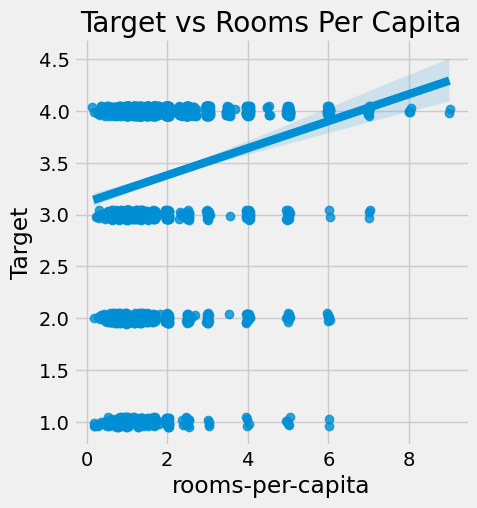

In [74]:
sns.lmplot(x='rooms-per-capita', y='Target', fit_reg=True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Rooms Per Capita');

__Correlation Heatmap__  
One of my favorite plots is the correlation heatmap because it shows a ton of info in one image. For the heatmap, we'll pick 7 variables and show the correlations between themselves and with the target.  
  
__DeepL 번역__  
제가 가장 좋아하는 플롯 중 하나는 상관관계 히트맵으로, 하나의 이미지에 많은 정보를 보여주기 때문입니다. 이 히트맵에서는 7개의 변수를 선택하고 변수 간의 상관관계와 대상과의 상관관계를 표시하겠습니다.

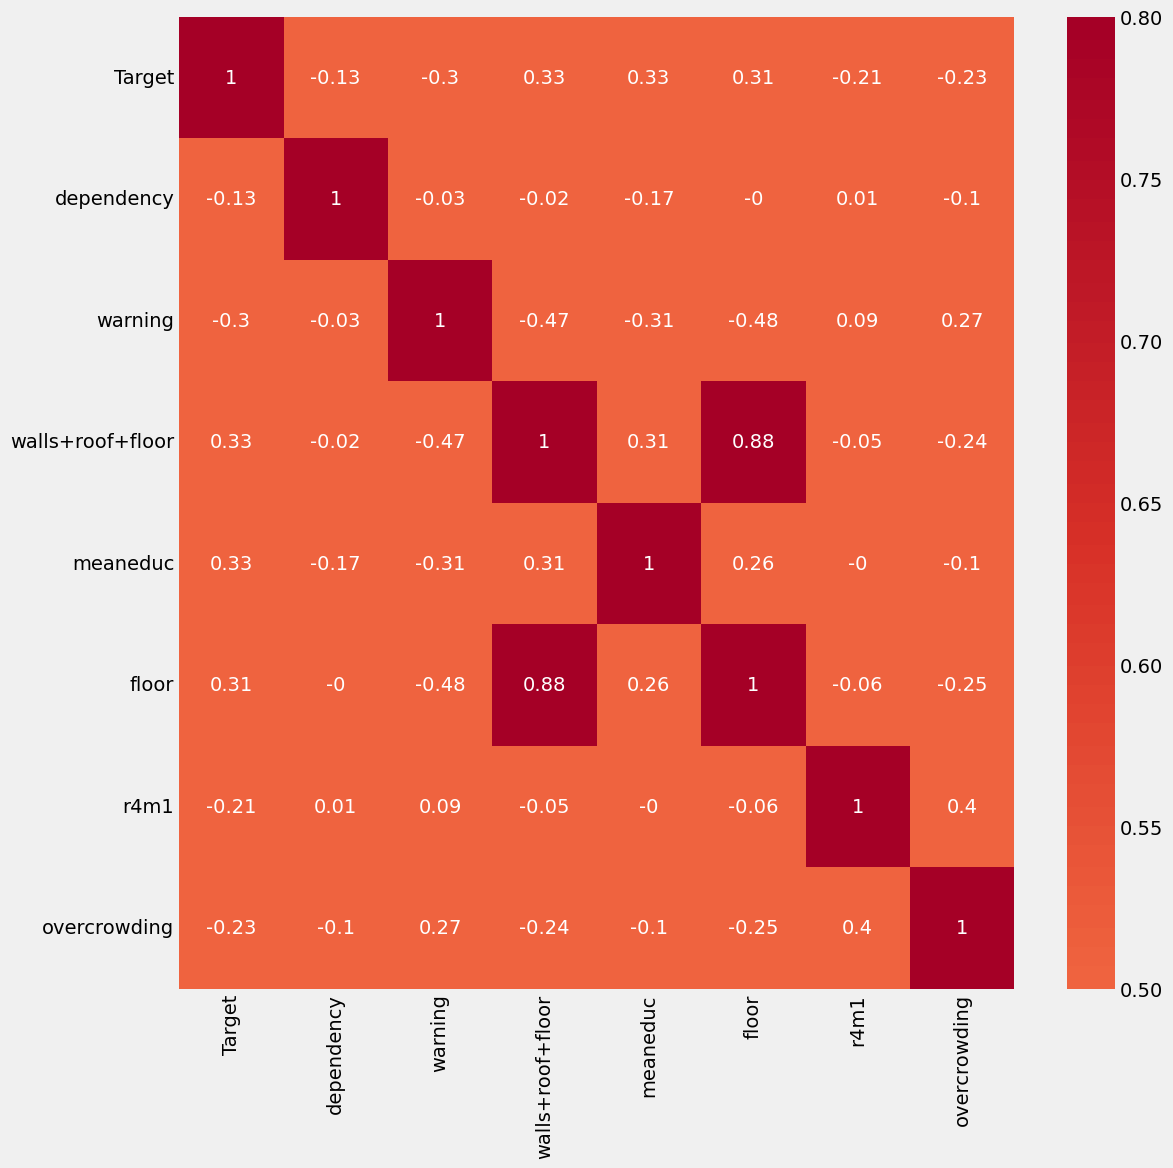

In [75]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc', 'floor', 'r4m1', 'overcrowding']

## Calculate the correlations
corr_mat = train_heads[variables].corr().round(2)

## Draw a correlation heatmap
# plt.rcParams['font.size'] = 18
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, vmin=0.5, vmax=0.8, center=0, cmap=plt.cm.RdYlGn_r, annot=True);
# 색이 다르게 나오는데 방법을 찾지 못함

This plot shows us that there are a number of variables that have a weak correlation with the `Target`. There are also high correlations between some variables (such as `floor` and `walls+roof+floor`) which could pose an issue because of collinearity.  
  
### Features Plot
For the final exploration of the household level data, we can make a plot of some of the most correlated variables with the Target. This shows scatterplots on the upper triangle, kernel density estimate (kde) plots on the diagonal, and 2D KDE plots on the lower triangle.  
  
__DeepL 번역__  
이 플롯은 `Target`과 상관관계가 약한 변수가 많다는 것을 보여줍니다. 또한 일부 변수(예: `floor` 및 `walls+roof+floor`) 간에는 상관관계가 높아 상관관계로 인해 문제가 될 수 있습니다.  
  
### Features Plot
가구 수준 데이터의 최종 탐색을 위해 타겟과 가장 상관관계가 높은 몇 가지 변수를 플롯으로 만들 수 있습니다. 위쪽 삼각형에는 산점도가, 대각선에는 커널 밀도 추정치(KDE) 플롯이, 아래쪽 삼각형에는 2D KDE 플롯이 표시됩니다.

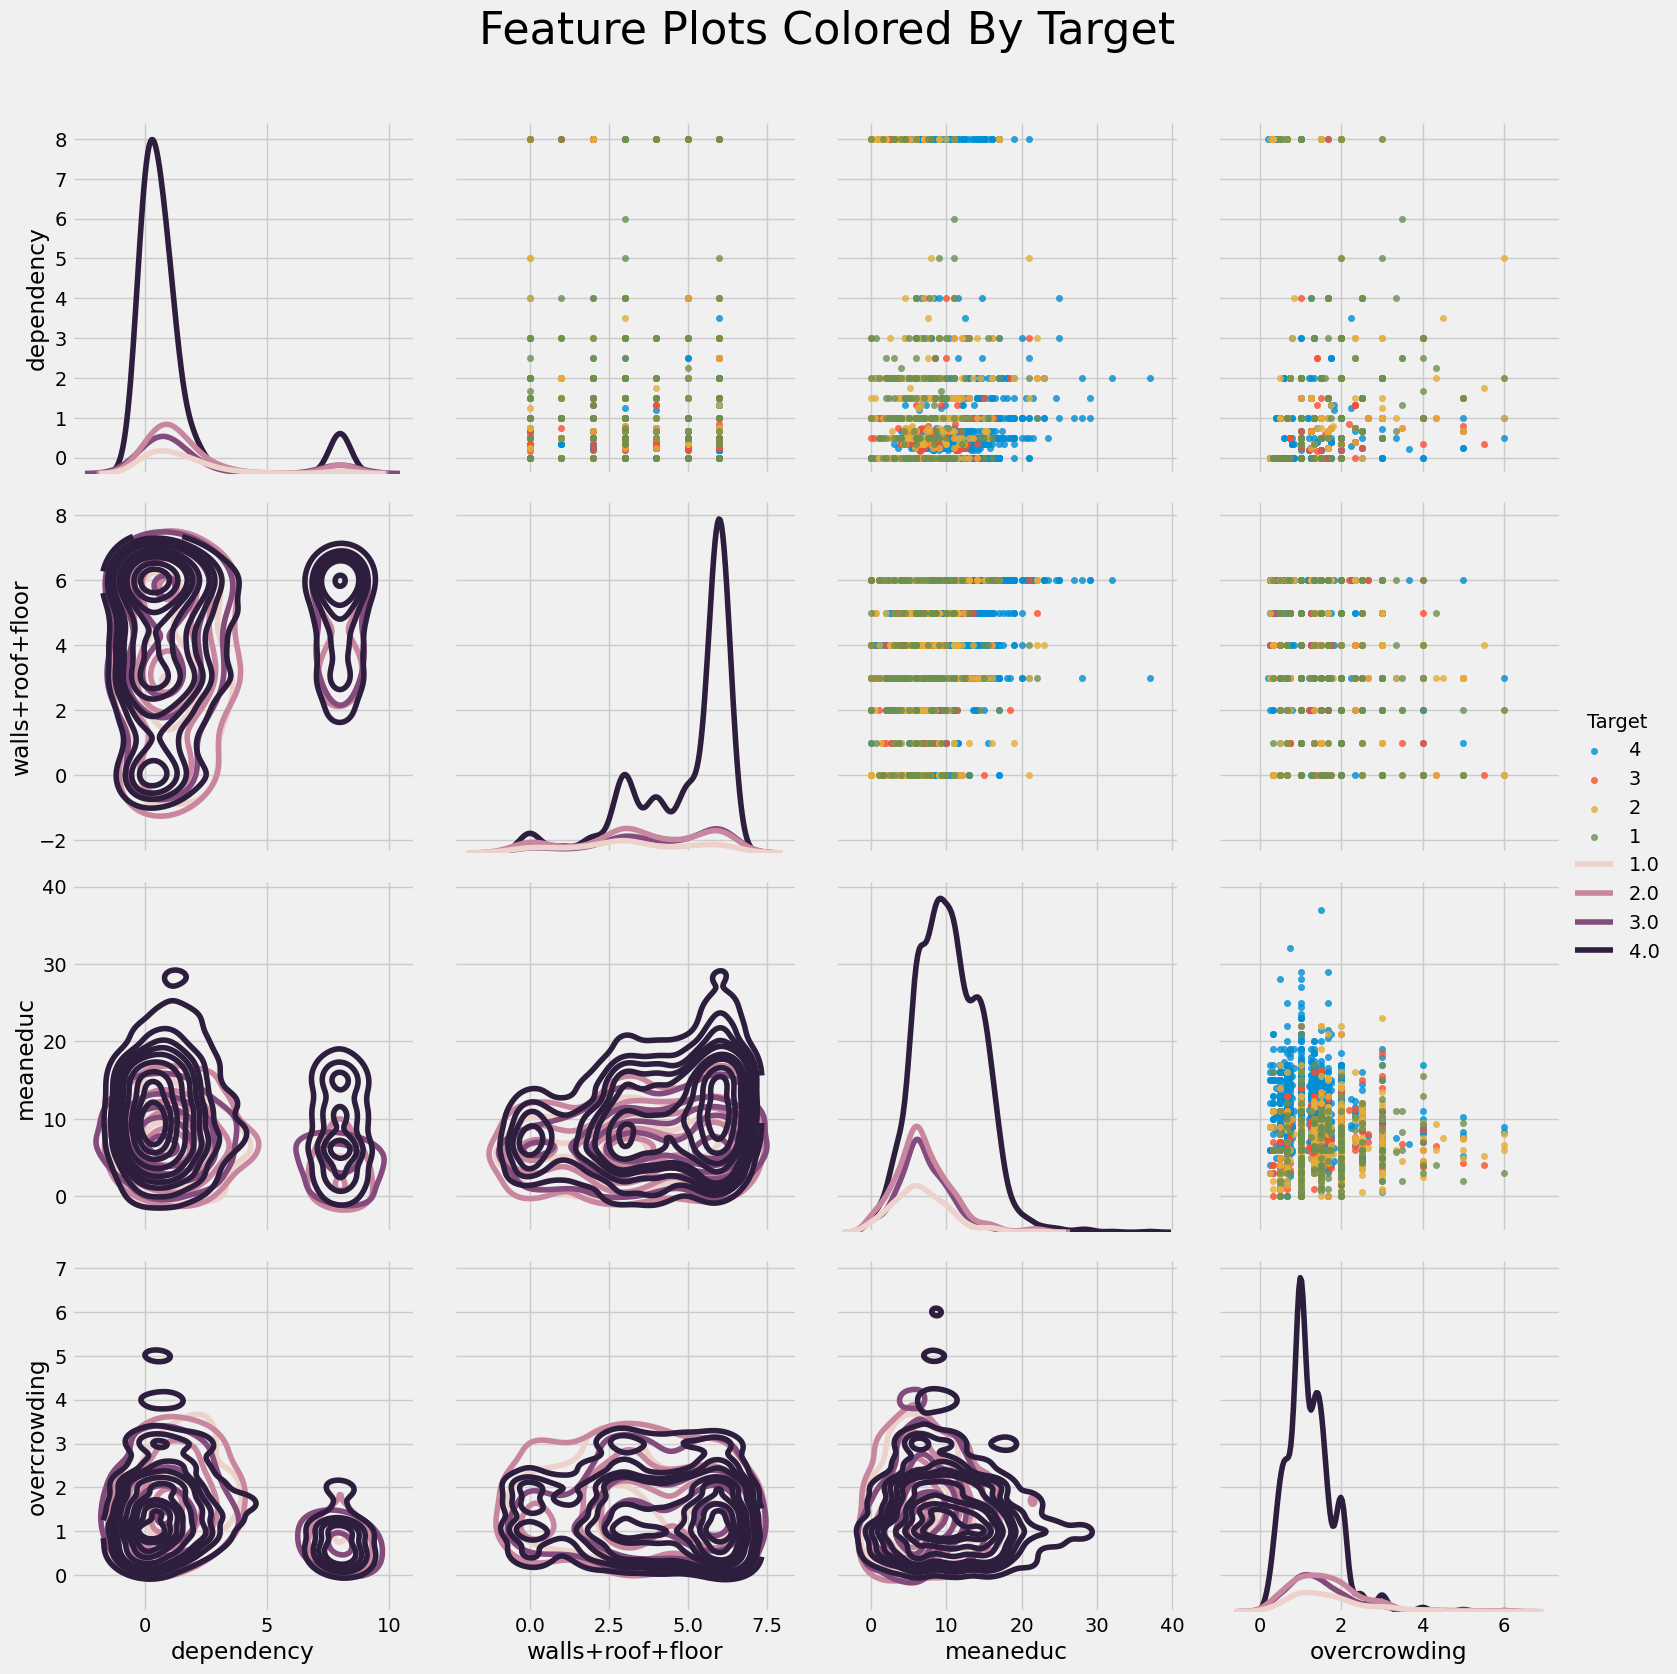

In [76]:
import warnings

warnings.filterwarnings('ignore')

## Copy the data for plotting
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor', 'meaneduc', 'overcrowding']]

## Create the pairgrid object
grid = sns.PairGrid(data=plot_data, height=4, diag_sharey=False, hue='Target', hue_order=[4,3,2,1],
                    vars=[x for x in list(plot_data.columns) if x != 'Target'])

## Upper is a scatter plot
grid.map_upper(plt.scatter, alpha=0.8, s=20)

## Diagnal is a histogram
grid.map_diag(sns.kdeplot)

## Bottom is density plot
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size=32, y=1.05);

# 색과 값 등이 많이 다른데 해결하지 못함

In [77]:
# We'll leave the feature engineering of the household variables for now.
# Later, we can come back to this step if we are not pleased with the model performance.

household_feats = list(heads.columns)

## Individual Level Variables
There are two types of individual level variables: Boolean (1 or 0 for True or False) and ordinal (discrete values with a meaningful ordering).

In [78]:
ind = data[id_+ind_bool+ind_ordered]
ind.shape

(33413, 40)

### Redundant Individual Variables
We can do the same process we did with the household level variables to identify any redundant individual variables. We'll focus on any variables that have an absolute magnitude of the correlation coefficient greater than 0.95.  
  
### DeepL 번역
가구 수준 변수와 동일한 프로세스를 수행하여 중복되는 개별 변수를 식별할 수 있습니다. 상관 계수의 절대 크기가 0.95보다 큰 모든 변수에 초점을 맞출 것입니다.

In [79]:
## Create correlation matrix
corr_matrix = ind.corr(numeric_only=True)

## Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

## Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column])>0.95)]

to_drop

['female']

In [80]:
ind = ind.drop(columns='male')

### Creating Ordinal Variables
Much as we did with the household level data, we can map existing columns to an ordinal variable. Here we will focus on the `instlevel_` variables which indicate the amount of education an individual has from `instlevel1`: no level of education to `instlevel9`: postgraduate education.  
  
To create the ordinal variable, for each individual, we will simply find which column is non-zero. The education has an inherent ordering (higher is better) so this conversion to an ordinal variable makes sense in the problem context.  
  
### DeepL 번역
가구 수준 데이터에서 했던 것과 마찬가지로 기존 열을 서수 변수에 매핑할 수 있습니다. 여기서는 개인의 교육 수준을 나타내는 `instlevel_` 변수에 초점을 맞추겠습니다. `instlevel1`: 무학에서 `instlevel9`: 대학원 교육까지 교육 수준을 나타냅니다.  
  
서수 변수를 만들려면 각 개인에 대해 어떤 열이 0이 아닌지 찾으면 됩니다. 교육에는 고유한 순서(높을수록 좋음)가 있으므로 이러한 서수 변수로의 변환은 문제 맥락에서 의미가 있습니다.

In [81]:
ind[[c for c in ind if c.startswith('instl')]].head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


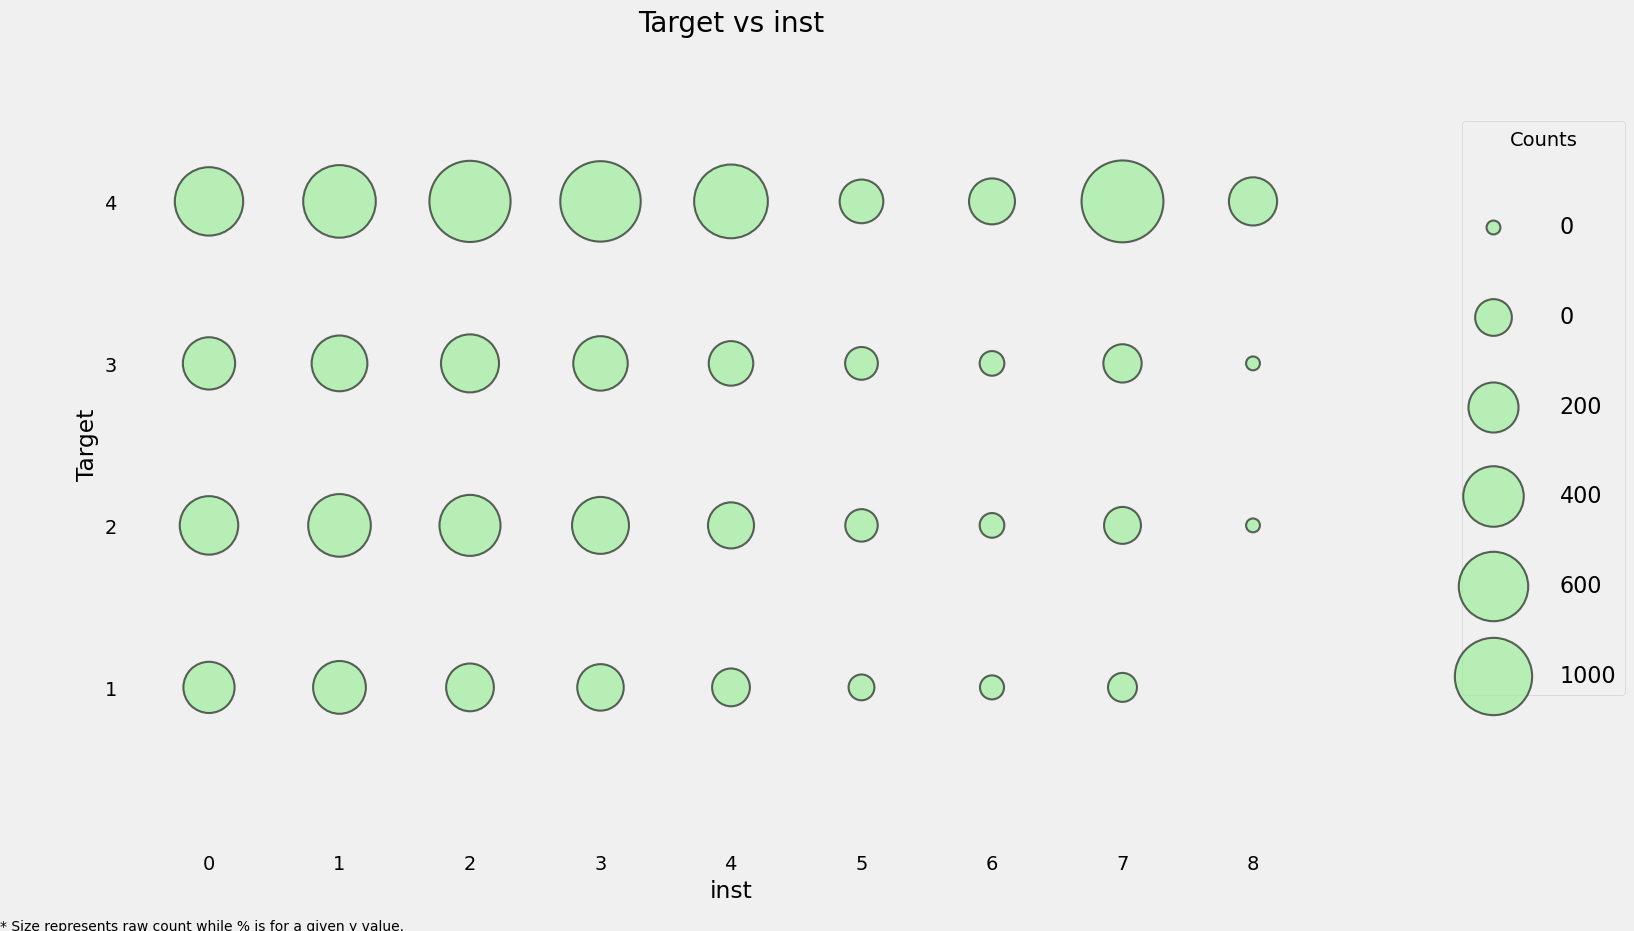

In [82]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis=1)

plot_categoricals('inst', 'Target', ind, annotate=False);

Higher levels of education seem to correspond to less extreme levels of poverty. We do need to keep in mind this is on an individual level though and we eventually will have to aggregate this data at the household level.  
  
__DeepL 번역__  
교육 수준이 높을수록 빈곤 수준이 덜 극단적인 것으로 보입니다. 하지만 이는 개인 수준이라는 점을 염두에 두어야 하며, 결국 가구 수준에서 이 데이터를 집계해야 할 것입니다.

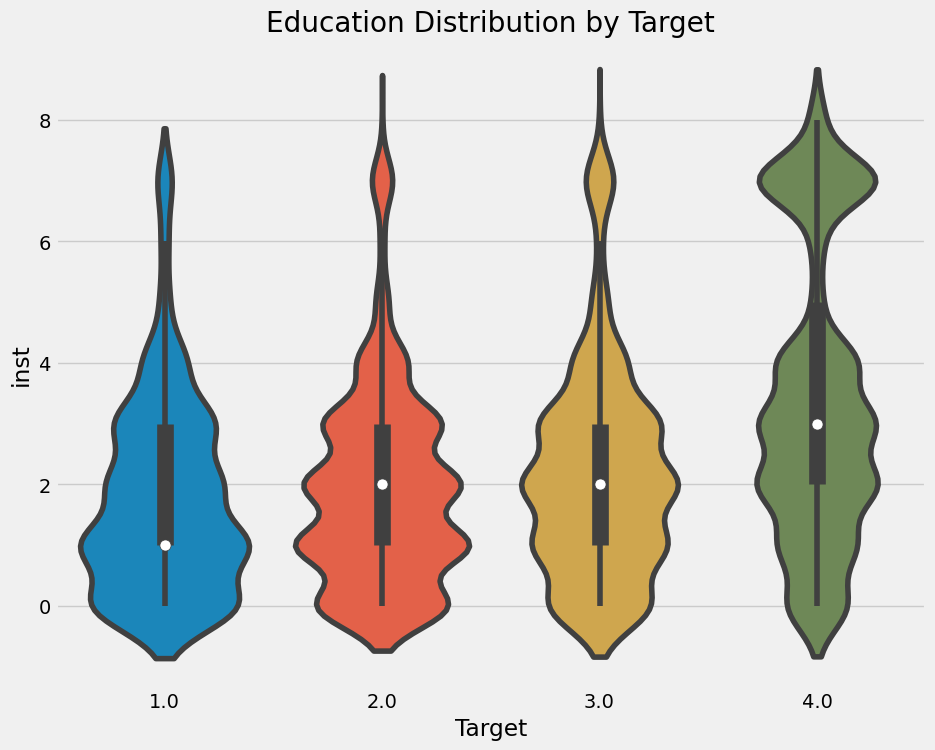

In [83]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Target', y='inst', data=ind)
plt.title('Education Distribution by Target');

In [84]:
## Drop the education columns
## ind = ind.drop(columns=[c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 40)

### Feature Construction¶
We can make a few features using the existing data. For example, we can divide the years of schooling by the age.

<Axes: xlabel='Target', ylabel='escolari/age'>

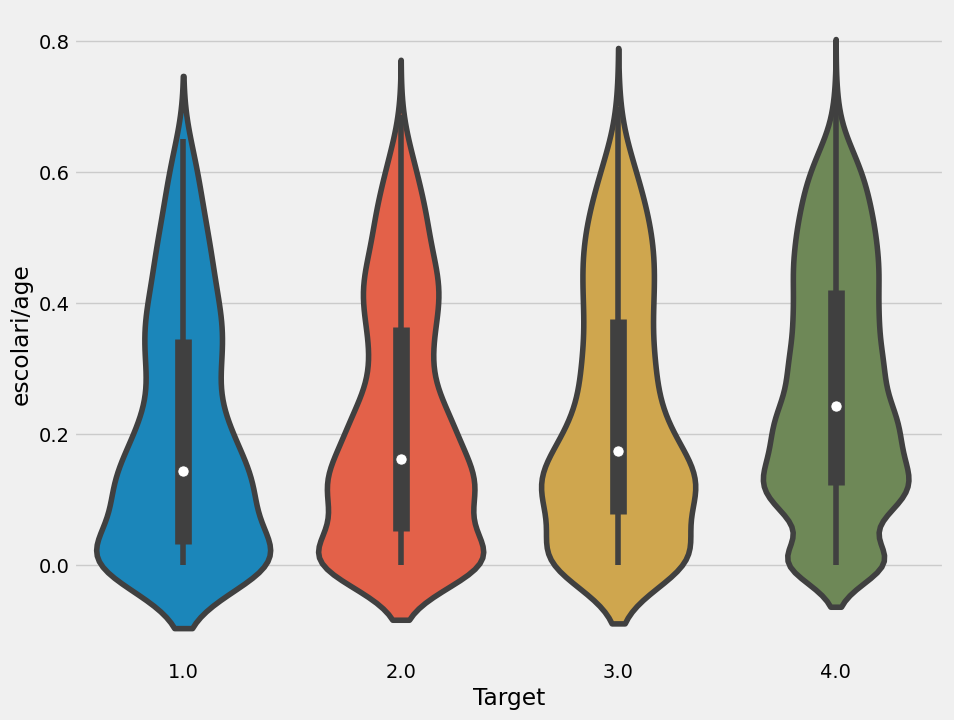

In [85]:
ind['escolari/age'] = ind['escolari']/ind['age']

plt.figure(figsize=(10,8))
sns.violinplot(x='Target', y='escolari/age', data=ind)

We can also take our new variable, `inst`, and divide this by the age. The final variable we'll name `tech`: this represents the combination of tablet and mobile phones.

In [86]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

### Feature Engineering through Aggregations
In order to incorporate the individual data into the household data, we need to aggregate it for each household. The simplest way to do this is to `groupby` the family id `idhogar` and then `agg` the data. For the aggregations for ordered or continuous variables, we can use six, five of which are built in to pandas, and one of which we define ourselves `range_`. The boolean aggregations can be the same, but this will create many redundant columns which we will then need to drop. For this case, we'll use the same aggregations and then go back and drop the redundant columns.  
  
### DeepL 번역
개별 데이터를 가구 데이터에 통합하려면 각 가구별로 데이터를 집계해야 합니다. 이를 수행하는 가장 간단한 방법은 가족 ID `idhogar`를 `groupby`한 다음 데이터를 `agg`하는 것입니다. 정렬 또는 연속형 변수에 대한 집계에는 6개를 사용할 수 있으며, 그 중 5개는 팬더에 내장되어 있고 하나는 `range_`로 정의합니다. 부울 집계는 동일할 수 있지만, 이렇게 하면 중복 열이 많이 생성되므로 삭제해야 합니다. 이 경우에는 동일한 집계를 사용한 다음 돌아가서 중복 열을 삭제하겠습니다.

In [87]:
# ind.info(verbose=2)
ind['rez_esc-missing'].unique()

array([False,  True])

In [88]:
## Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

## Group and aggregate
# ind_agg = ind.drop(columns='Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg = ind.drop(columns=['Target', 'Id', 'rez_esc-missing']).groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                ...  inst/age  \
           min max sum count  std range_ min max sum count  ...       sum   
idhogar                                                     ...             
000a08204    1   1   3     3  0.0      0   0   0   0     3  ...  0.483333   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  ...  0.016667   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  ...  0.511959   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  ...  0.184211   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  ...  0.213768   

                                    tech                            
          count       std    range_  min max sum count  std range_  
idhogar                                                             
000a08204     3  0.139775  0.250000    2   2   6     3  0.0      0  
000bce7c4     2  0.011785  0.016667    1   1   2     2  0.0      0  
001845fb0     4  0.060123  0.128205    1   1   4     4  0.0      0  
001ff74ca     1       NaN  0.000000    2   2   4     2  0.0      0  
003123ec2     4  0.064636  0.130435    1   1   4     4  0.0      0  

[5 rows x 234 columns]

In [89]:
## With just that one line, we go from 30 features to 180. Next we can rename the columns to make it easier to keep track.

## Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')

ind_agg.columns = new_col
ind_agg.head()


,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,...,inst/age-sum,inst/age-count,inst/age-std,inst/age-range_,tech-min,tech-max,tech-sum,tech-count,tech-std,tech-range_
idhogar,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,...,0.483333,3,0.139775,0.250000,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,...,0.016667,2,0.011785,0.016667,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,...,0.511959,4,0.060123,0.128205,1,1,4,4,0.0,0
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,...,0.184211,1,NaN,0.000000,2,2,4,2,0.0,0
003123ec2,0,0,0,4,0.0,0,0,0,0,4,...,0.213768,4,0.064636,0.130435,1,1,4,4,0.0,0


In [90]:
ind_agg.iloc[:, [0,1,2,3,6,7,8,9]].head()

,v18q-min,v18q-max,v18q-sum,v18q-count,dis-min,dis-max,dis-sum,dis-count
idhogar,,,,,,,,
000a08204,1,1,3,3,0,0,0,3
000bce7c4,0,0,0,2,0,1,1,2
001845fb0,0,0,0,4,0,0,0,4
001ff74ca,1,1,2,2,0,0,0,2
003123ec2,0,0,0,4,0,0,0,4


### Feature Selection
As a first round of feature selection, we can remove one out of every pair of variables with a correlation greater than 0.95.

In [91]:
## Create correlation matrix
corr_matrix = ind_agg.corr()

## Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

## Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


In [92]:
## We'll drop the columns and then merge with the heads data to create a final dataframe.

ind_agg = ind_agg.drop(columns=to_drop)
ind_feats = list(ind_agg.columns)

## Merge on the household id
final = heads.merge(ind_agg, on='idhogar', how='left')

print('Final features shape:', final.shape)

Final features shape: (10307, 228)


In [93]:
final.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,...,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_
0,ID_279628684,21eb7fcc1,4.0,0,0,1,1,1,0,0,...,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,ID_f29eb3ddd,0e5d7a658,4.0,0,0,1,1,0,0,0,...,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,ID_68de51c94,2c7317ea8,4.0,0,0,1,1,0,0,0,...,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,ID_ec05b1a7b,2b58d945f,4.0,0,0,1,1,1,0,0,...,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,ID_1284f8aad,d6dae86b7,4.0,1,0,1,1,1,0,0,...,0.965584,0.168946,0.392857,0.142857,0.060063,0.142857,1,4,0.0,0


https://www.kaggle.com/code/willkoehrsen/a-complete-introduction-and-walkthrough/notebook